# Fandango's Project
## Overview

Fandango is a company that sells movie tickets and also rates those movies. With some strange movie ratings, a discussion appears about how trusty those movie stars can be. Is the website presenting better reviews to get more people to watch movies?


### Goal:

The goal here is to present a discussion based on "538 article" and see if Fandango's rate movie is trusty. I will use pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.

The cited article is below:

**[Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----


### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. 

I will use two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic, IMDB, and Rotten Tomatoes.

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

`fandango_scrape.csv` contains every film 538 pulled from Fandango.


Fist import the packages to be used here and also check the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_sites = pd.read_csv('all_sites_scores.csv')
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [3]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [4]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [5]:
fandango = pd.read_csv('fandango_scrape.csv')
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


## Let's work first on Fandango's data:

**First, I will explore the relationship between the popularity of a film and its rating with Fandango's data.**

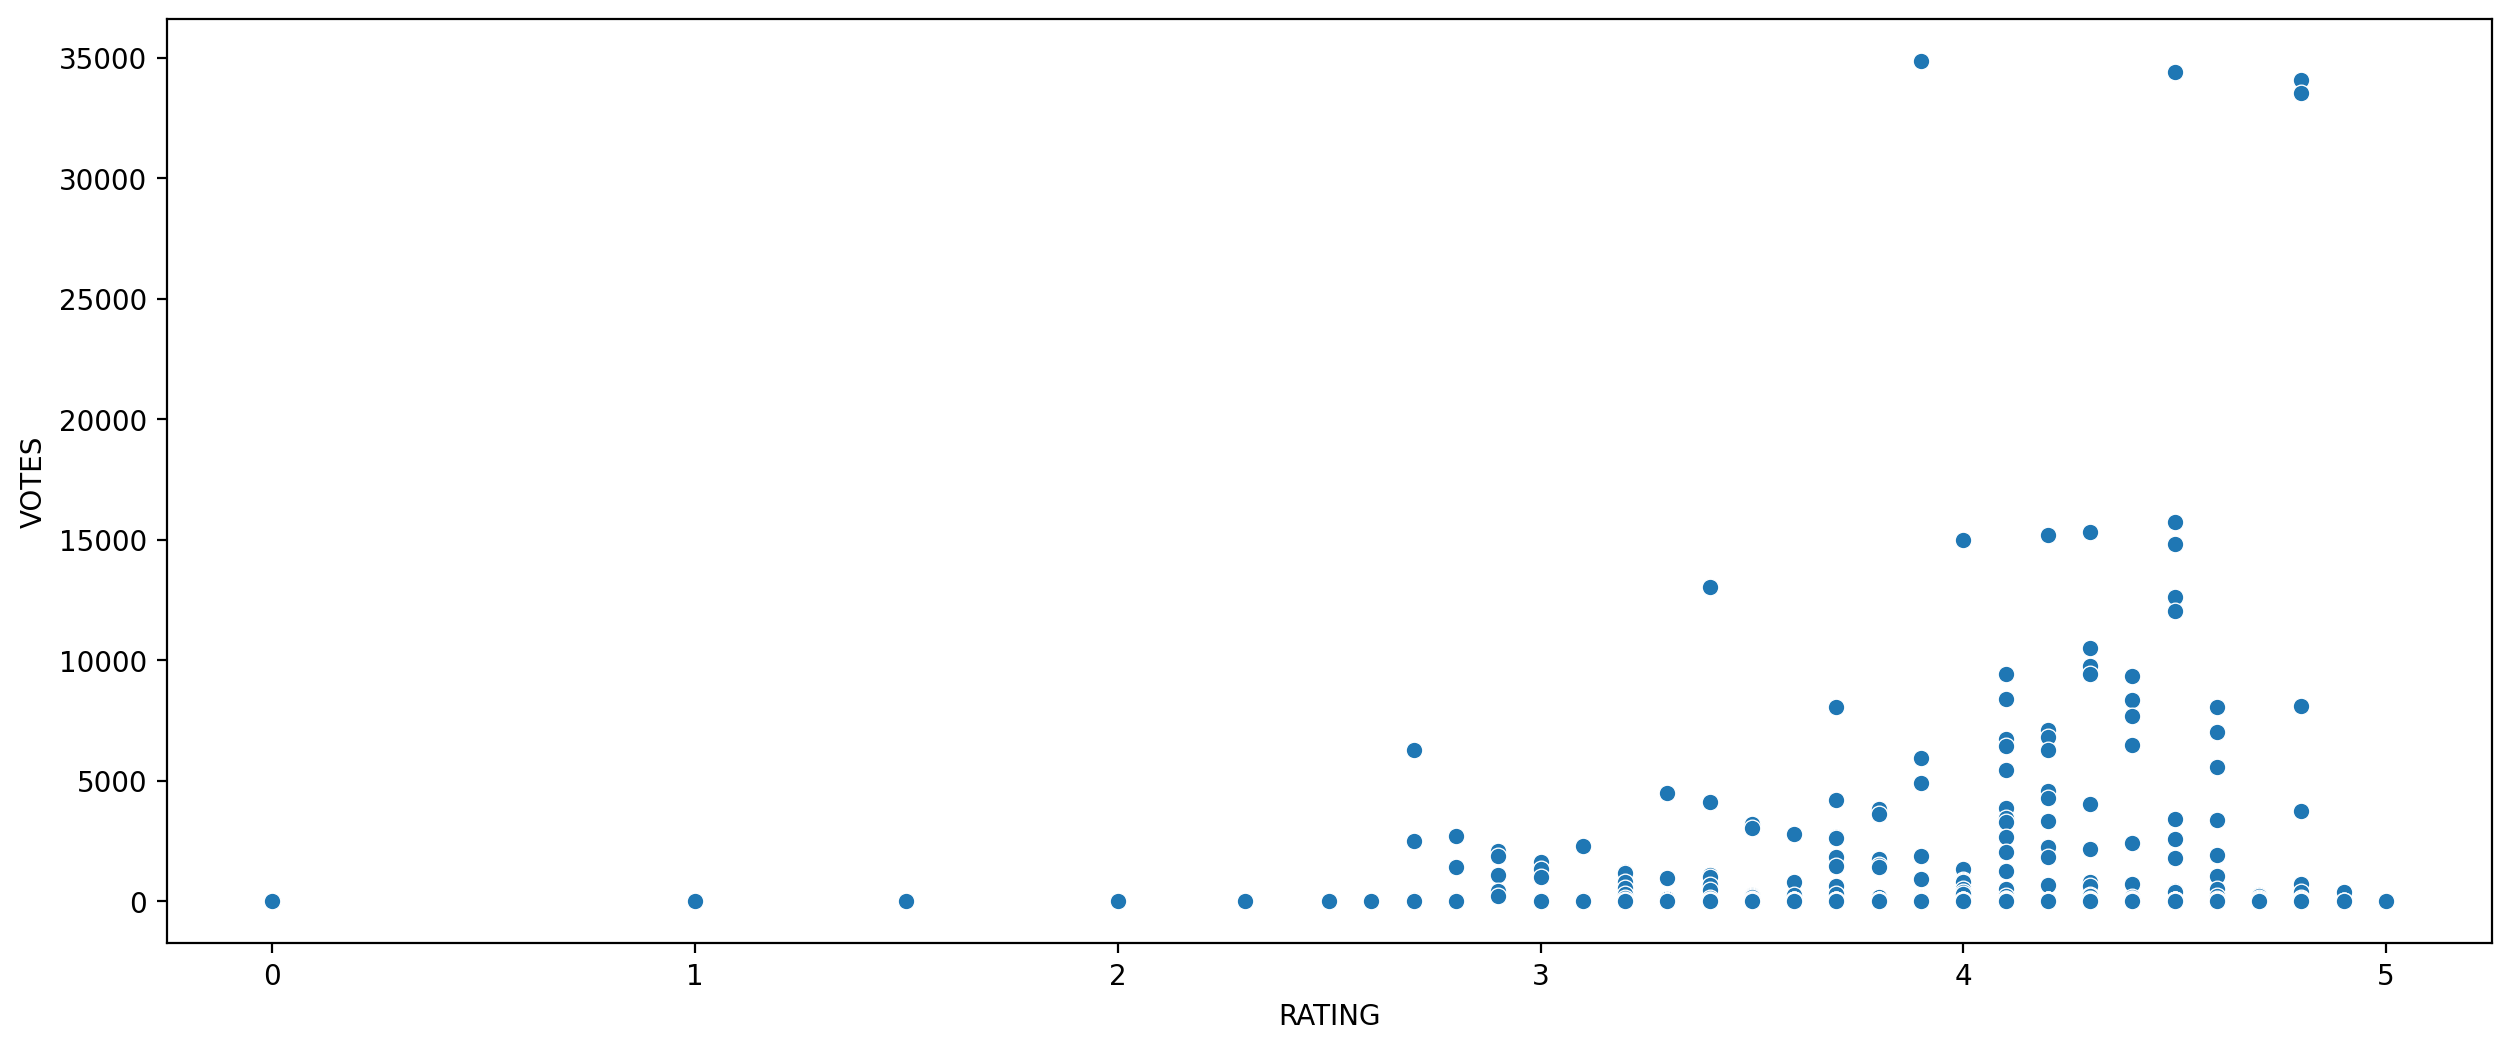

In [8]:
plt.figure(figsize=(15,6),dpi=200)
sns.scatterplot(data=fandango,x='RATING',y='VOTES');

**The correlation between these columns is:**

In [9]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**As an exercise, I will do a column with the data of the movies on Fandango's data.**

In [10]:
fandango = pd.read_csv('fandango_scrape.csv')
fandango['YEAR'] = fandango['FILM'].str[-5:].str.replace(')','')
#fandango['YEAR'] = fandango['FILM'].str.split('(').str[-1].str.replace(')','')
#fandango['FILM'] = fandango['FILM'].str[:-6]
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**With that information, we can check how many movies per year was scored on Fandango's data and plot that result.**

In [11]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

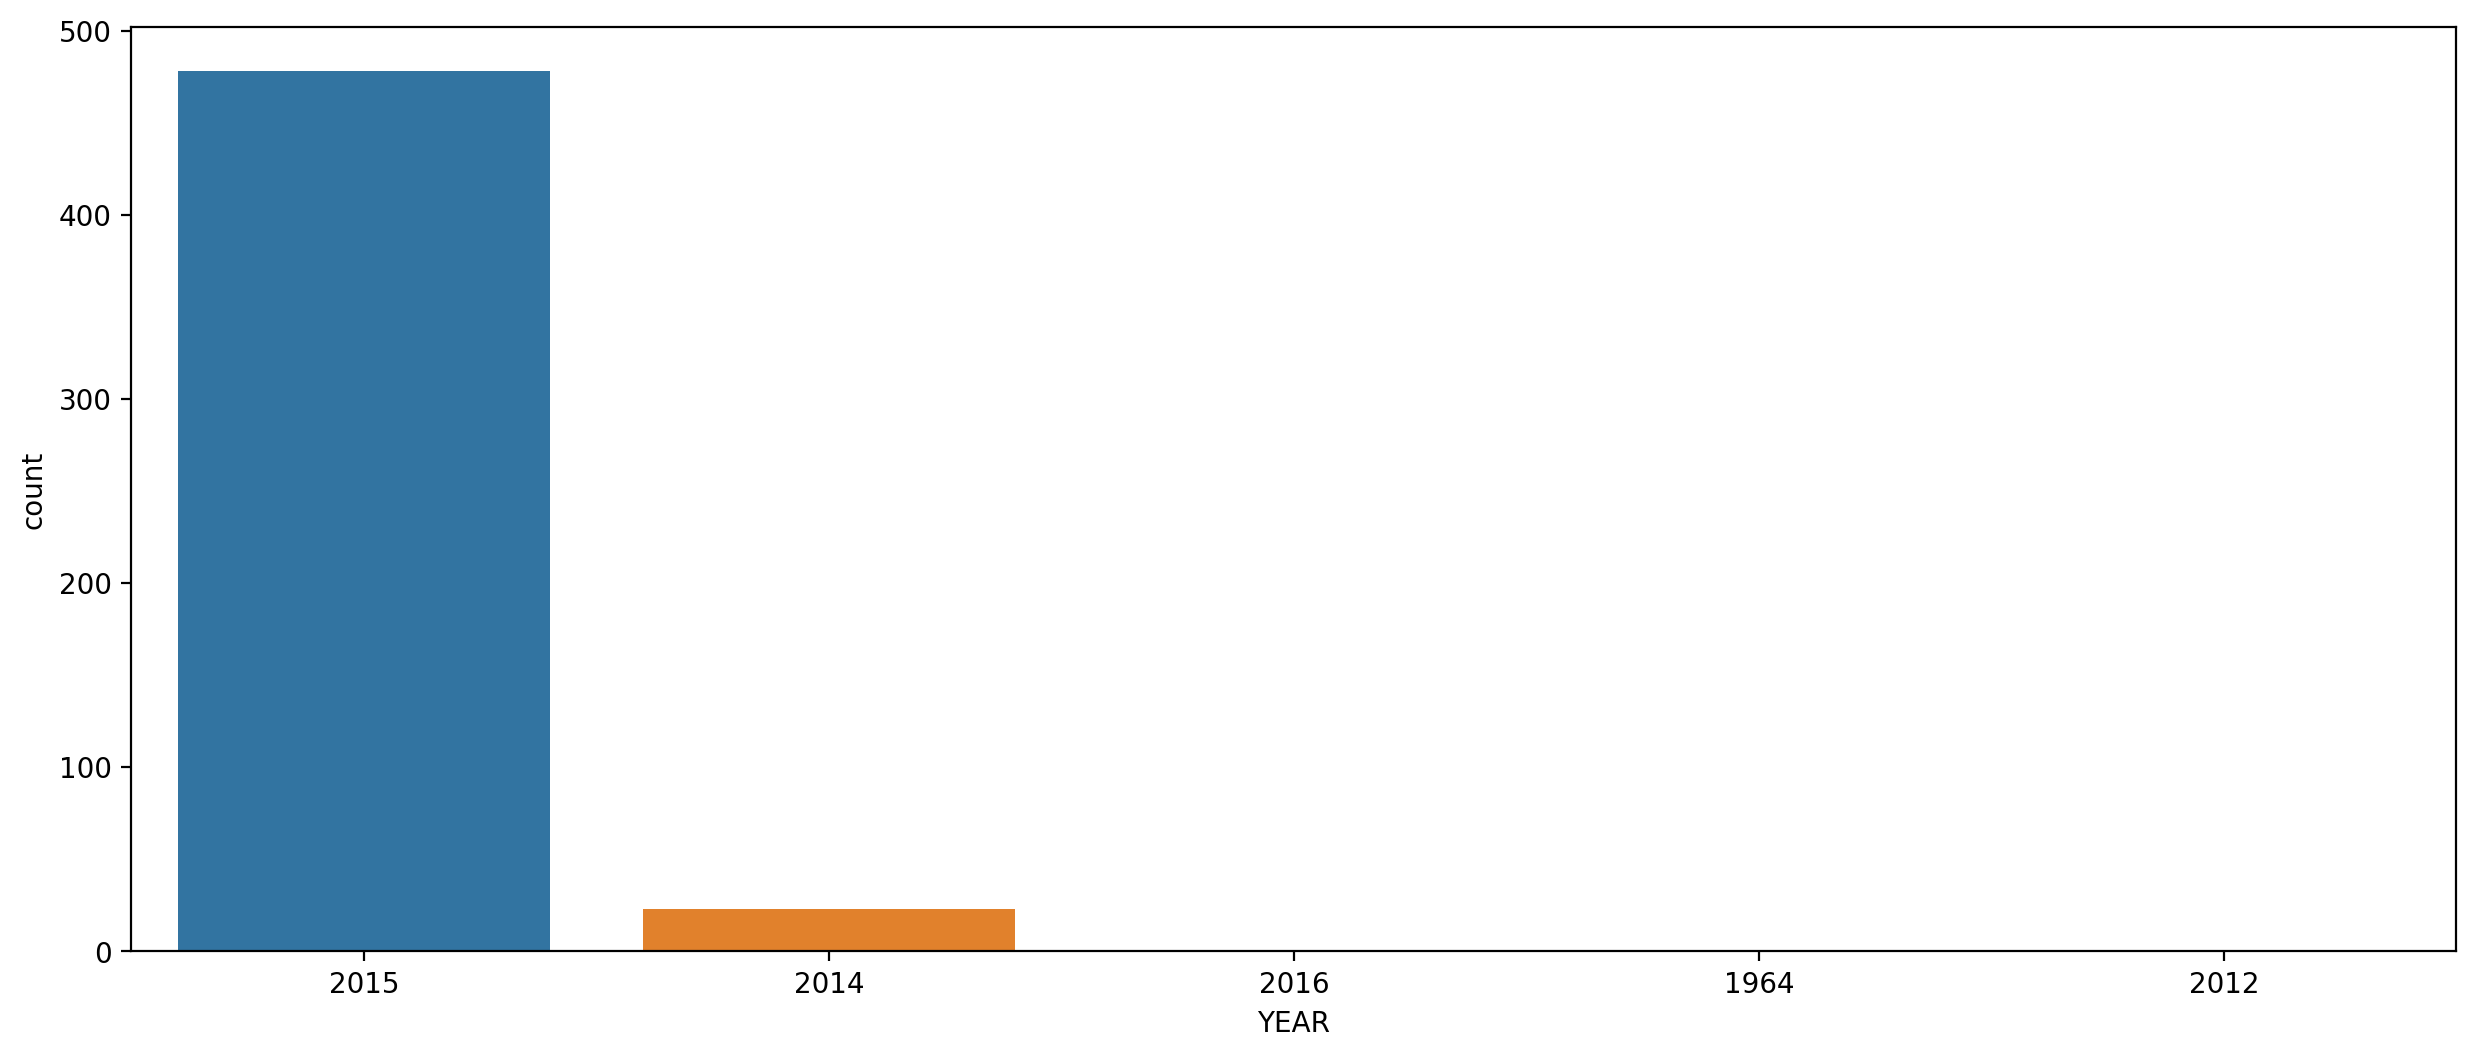

In [12]:
plt.figure(figsize=(15,6),dpi=200)
sns.countplot(data=fandango,x='YEAR');

**Let's check which are the movies with more votes.**

In [13]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Which ones and hou much have no votes.**

In [14]:
len(fandango[fandango['VOTES']==0])

69

In [15]:
fandango[fandango['VOTES']==0]

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


**Now, I will remove all movies without vote to be able to compare with to other datas.**

In [16]:
fandango = fandango[fandango['VOTES']!=0]
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


**There is a difference between the rating giving by HTML and the star rating presented by the website, shown to the user. Let's visualize this difference in distributions.** 

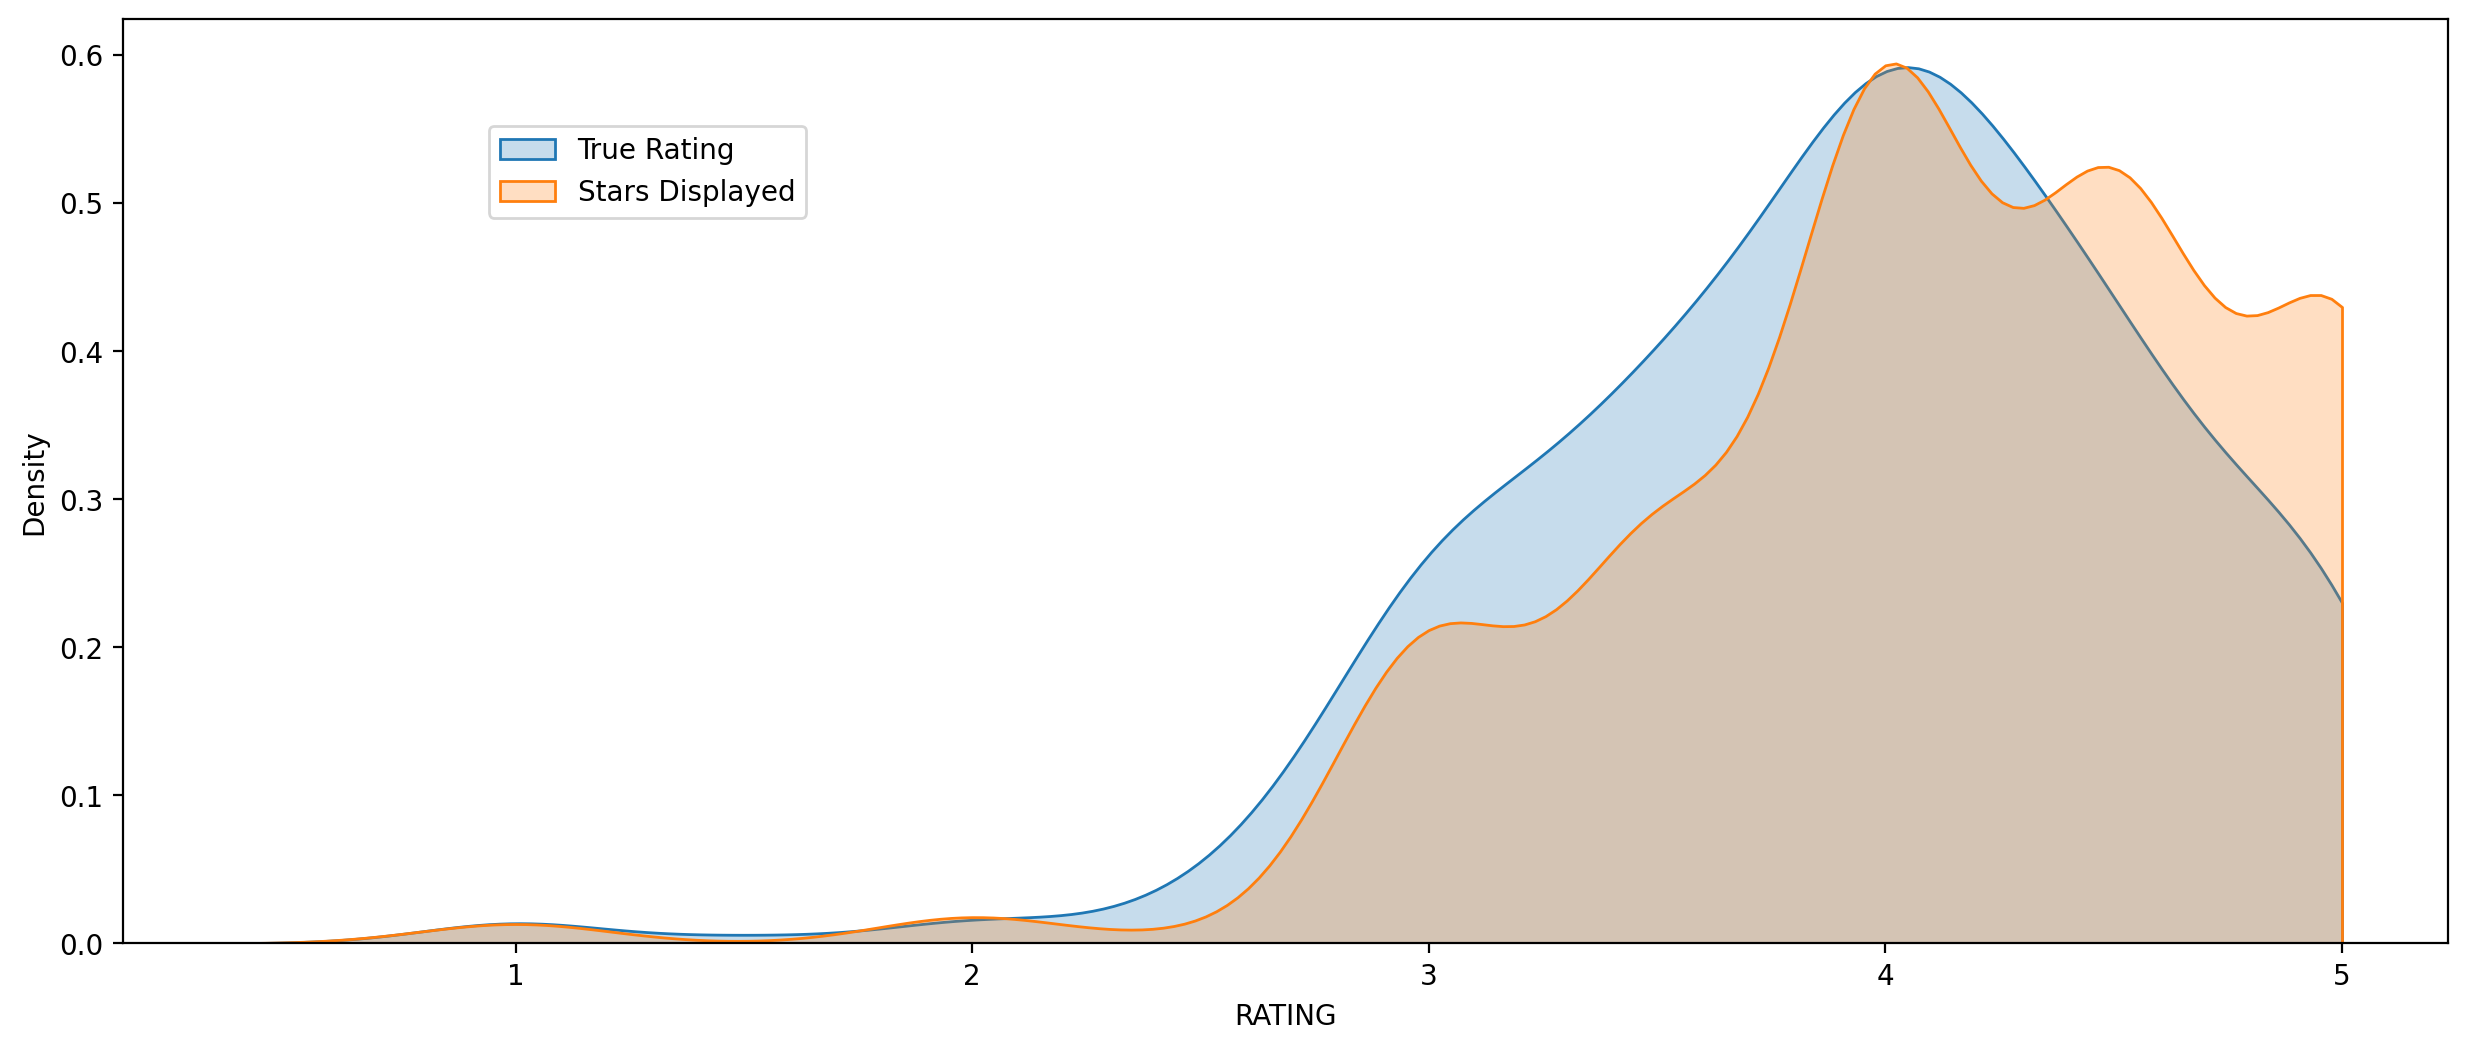

In [17]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(data=fandango,x='RATING',clip=[0,5],shade=True,label='True Rating')
sns.kdeplot(data=fandango,x='STARS',clip=[0,5],shade=True,label='Stars Displayed')

plt.legend(bbox_to_anchor=(0.3,0.9));

**Let's now quantify this discrepancy between those rating. I will create a column of the different between STARS displayed versus true RATING.**

In [18]:
fandango['STARS_DIFF'] = abs(fandango['STARS']-fandango['RATING']).round(1)
fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Let's check this result in a graph.**

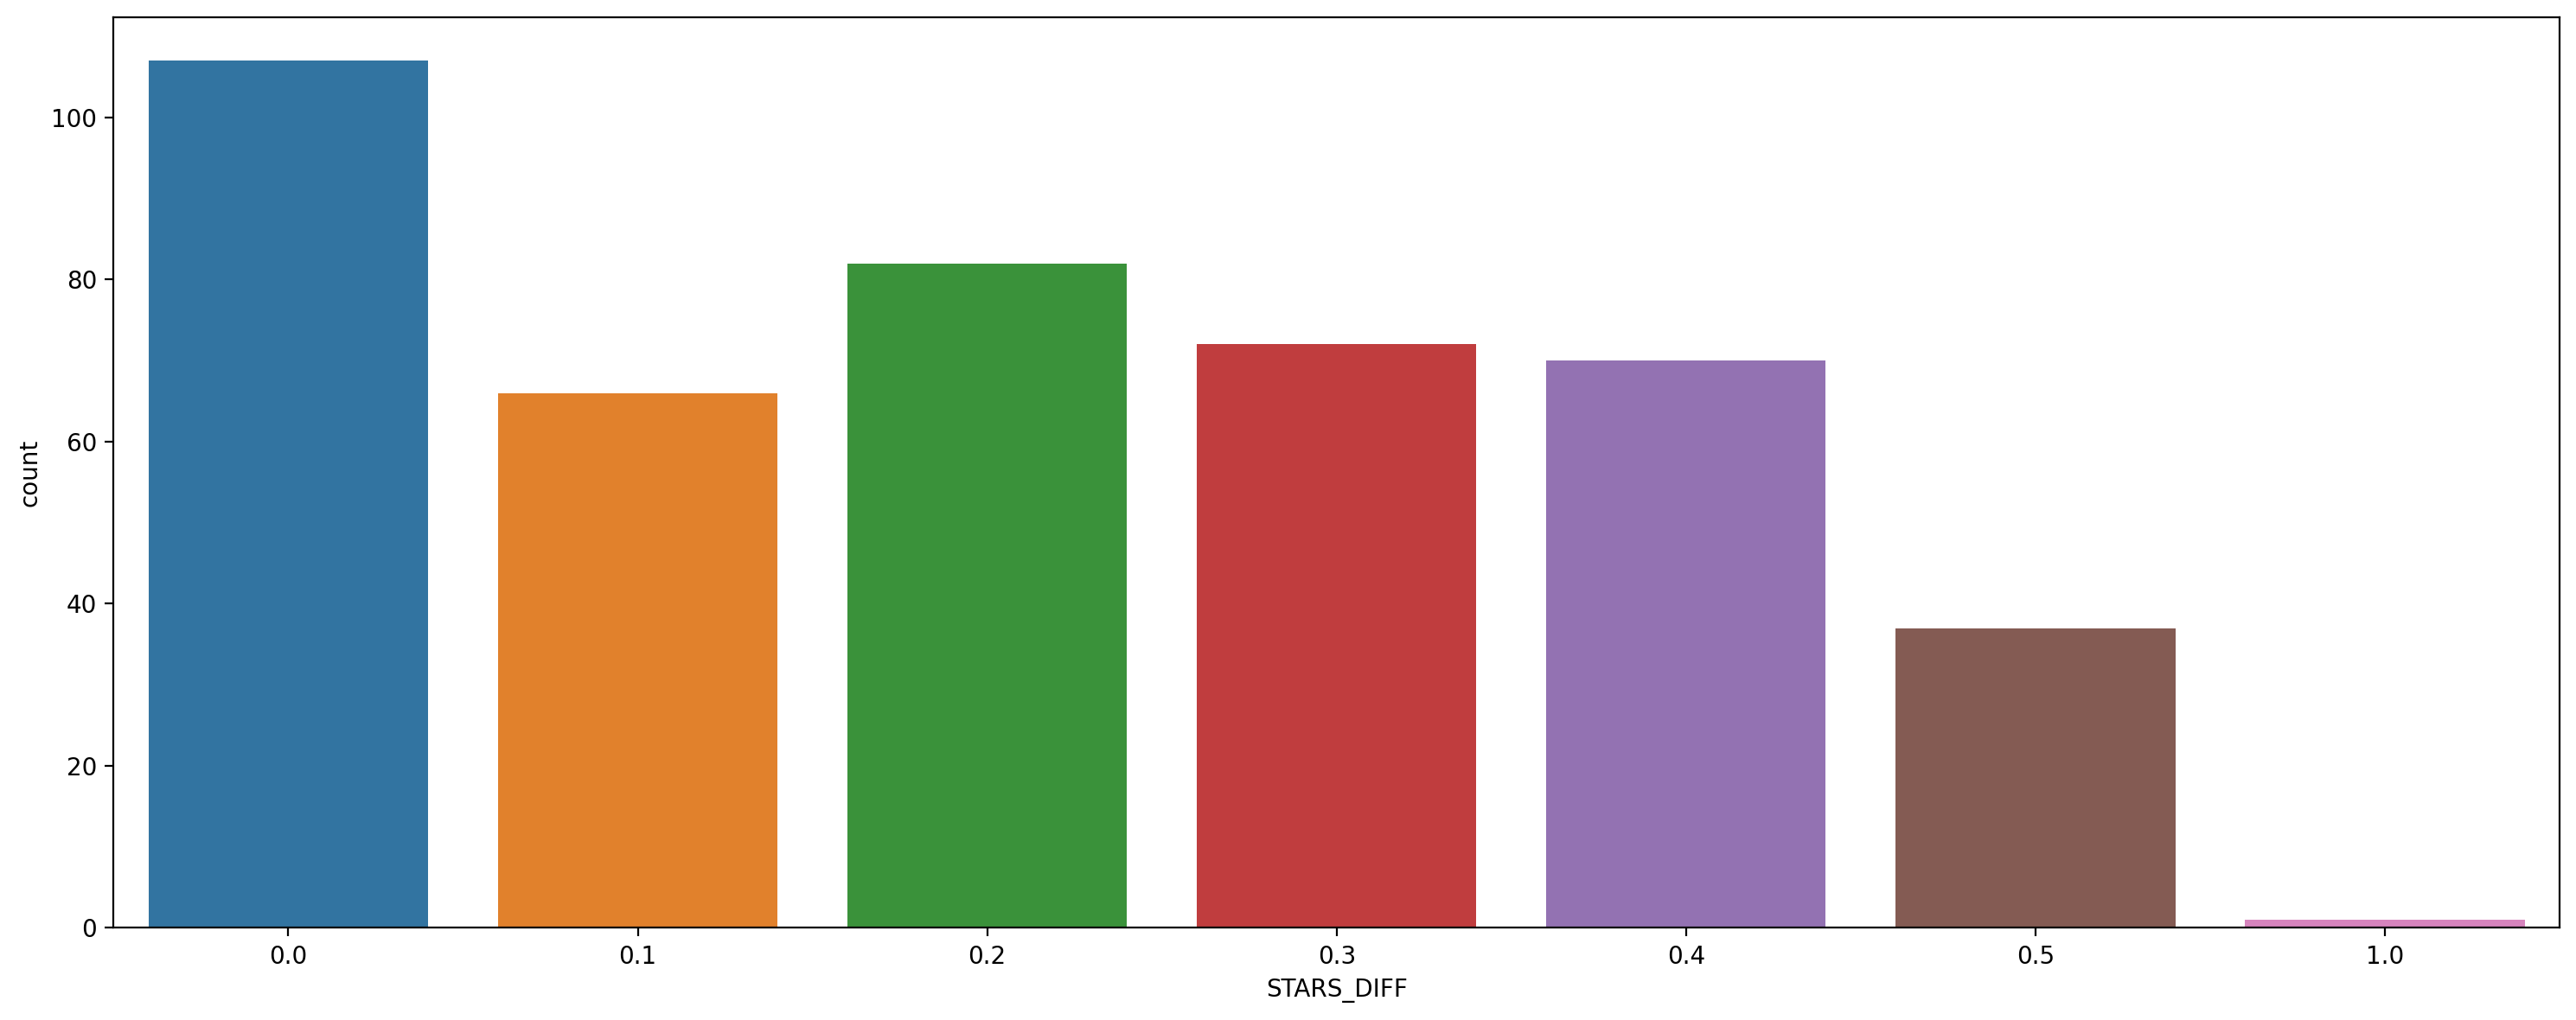

In [19]:
plt.figure(figsize=(15,6),dpi=200)
sns.countplot(data=fandango,x='STARS_DIFF')
plt.tight_layout()

**At least a movie show a super big difference of one star between these scores. Lets see which movie is that**

In [20]:
fandango[fandango['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Let's work first on Fandango's data:

**I will now check the data from the other file with the scores from other rankings plataforms.**

In [21]:
all_sites = pd.read_csv("all_sites_scores.csv")
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [22]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [23]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

**Let's first take a look at Rotten Tomatoes (RT). RT has two sets of reviews, one from their critics reviews (ratings published by official critics) and other from user reviews.** 

**Let's check how is the correlation between these two.**

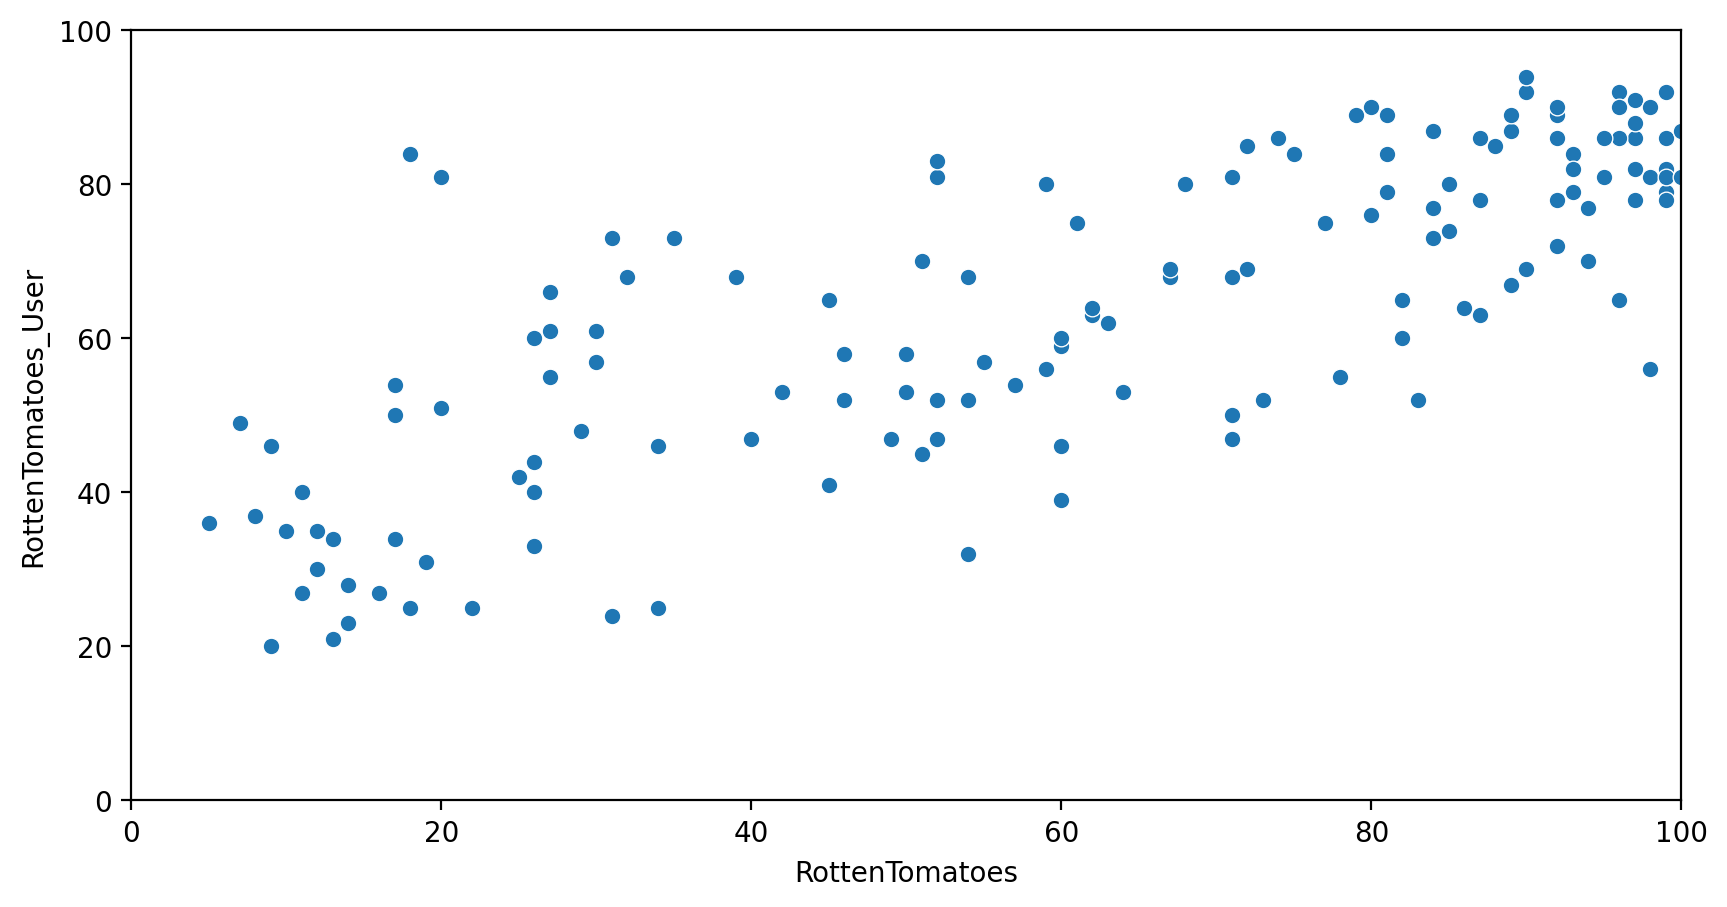

In [24]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100);

**It is possible to check a correlation between these votes, it means, normally users and critics agree with the movie rate.**

**Let's quantify this difference by comparing the critics ratings and the RT User ratings. I will present this with the difference between RottenTomatoes and RottenTomatoes_User. Rotten_Diff values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.**

In [25]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


**Let's compare the overall mean difference. This data will provide us the average difference between the both rates, from the critics and from the users.**

In [26]:
abs(all_sites['Rotten_Diff']).mean()

15.095890410958905

**The differences between RT Critics Score and RT User Score is presented below. As discussed, values closer to 0 means aggrement between Critics and Users, positive values means critics rated much higher than users, and negative values means users rated much higher than critics. A KDE distribuition is also presented.**

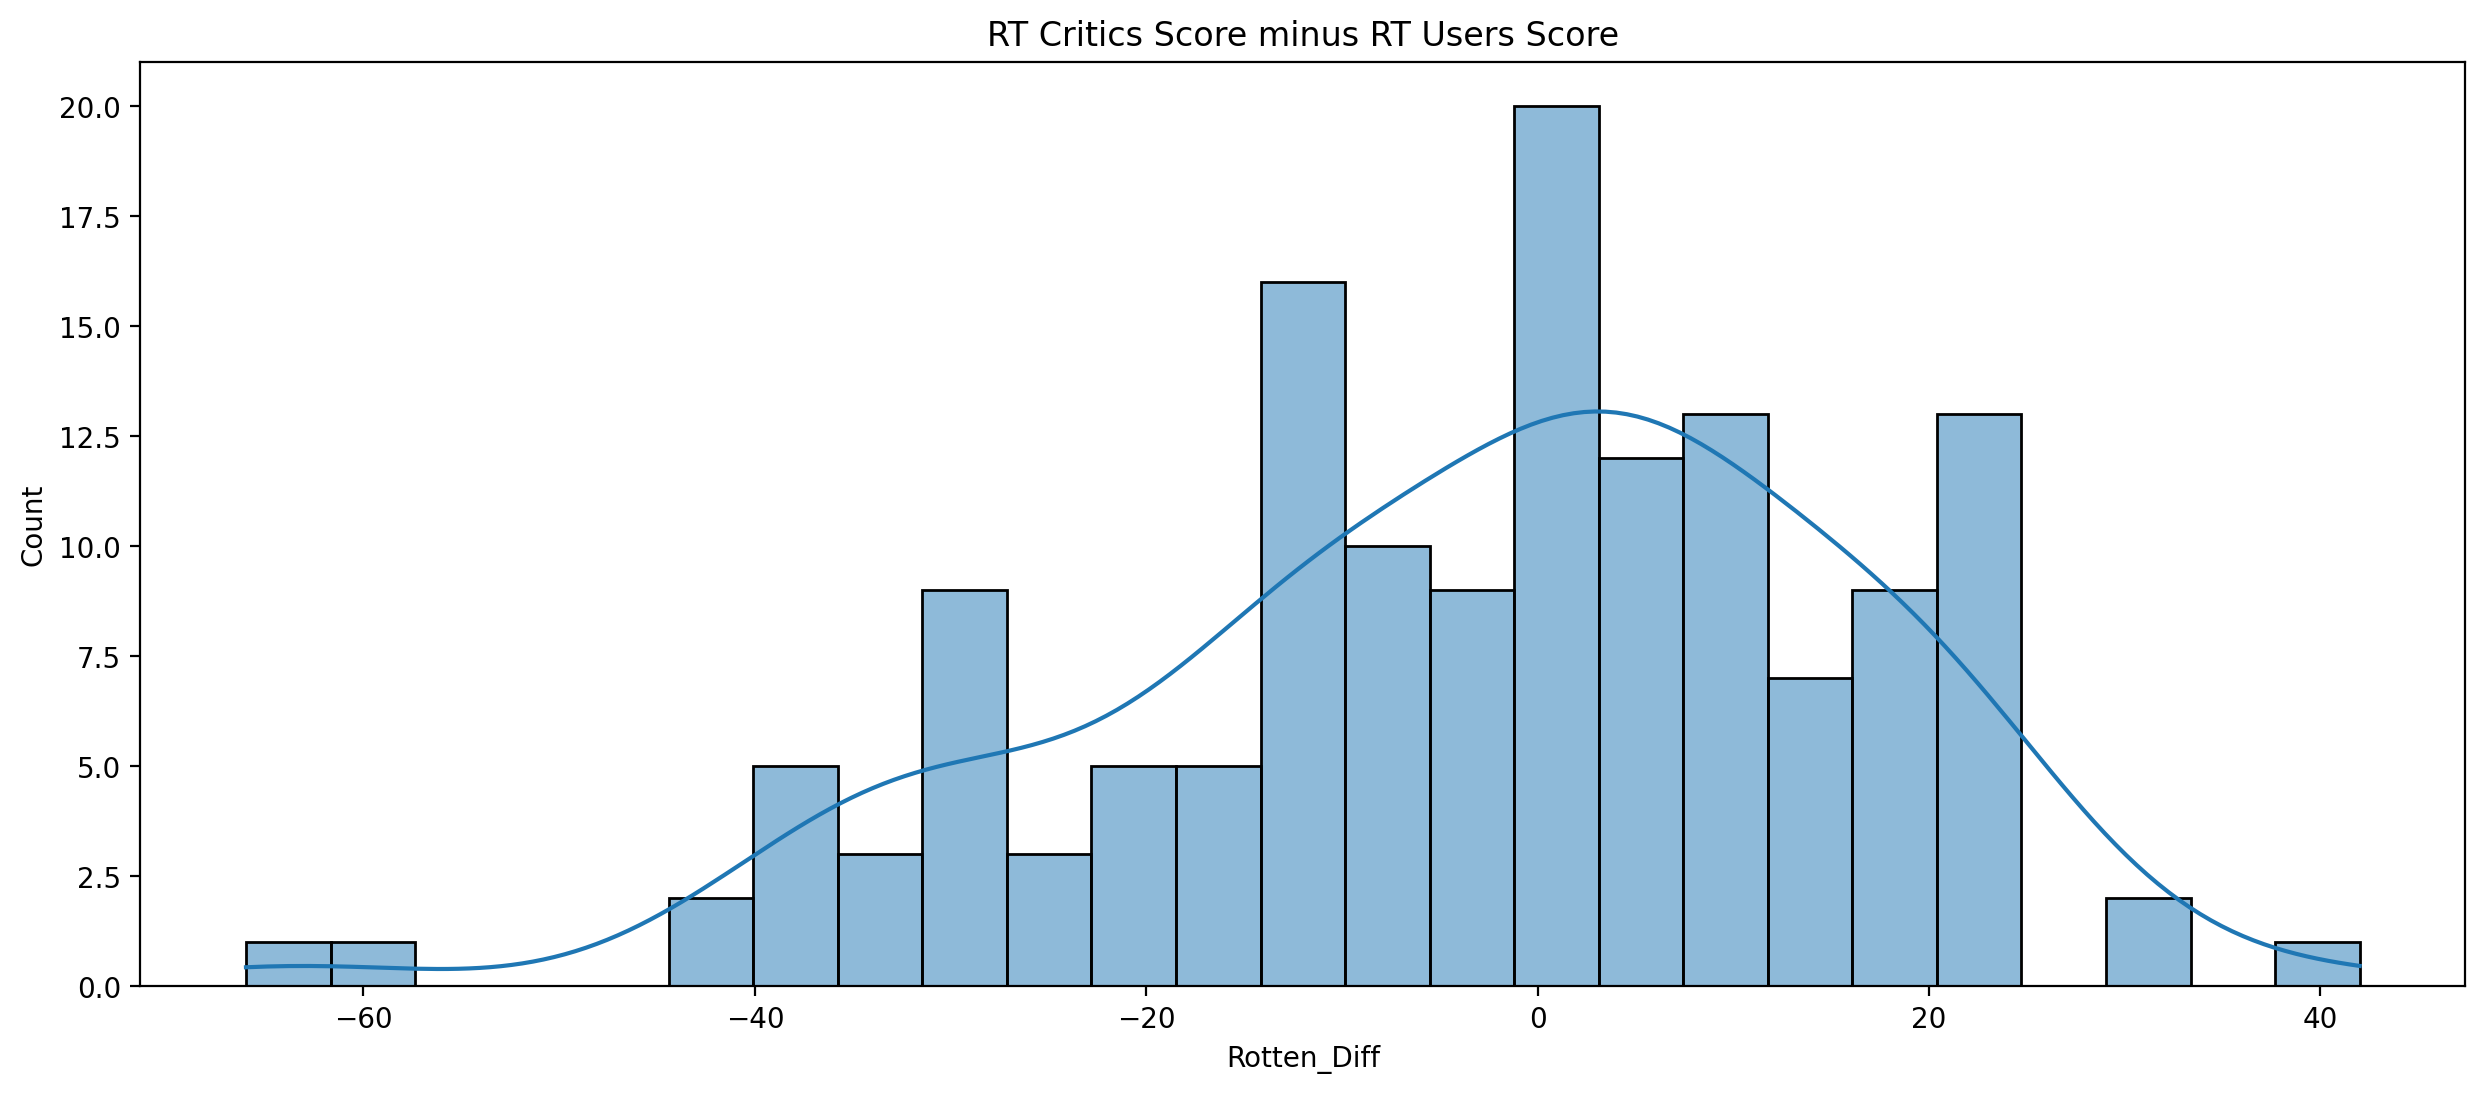

In [27]:
plt.figure(figsize=(15,6),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)
plt.title('RT Critics Score minus RT Users Score');

**The absolute value difference between Critics and Users on Rotten Tomatoes is presented below.**

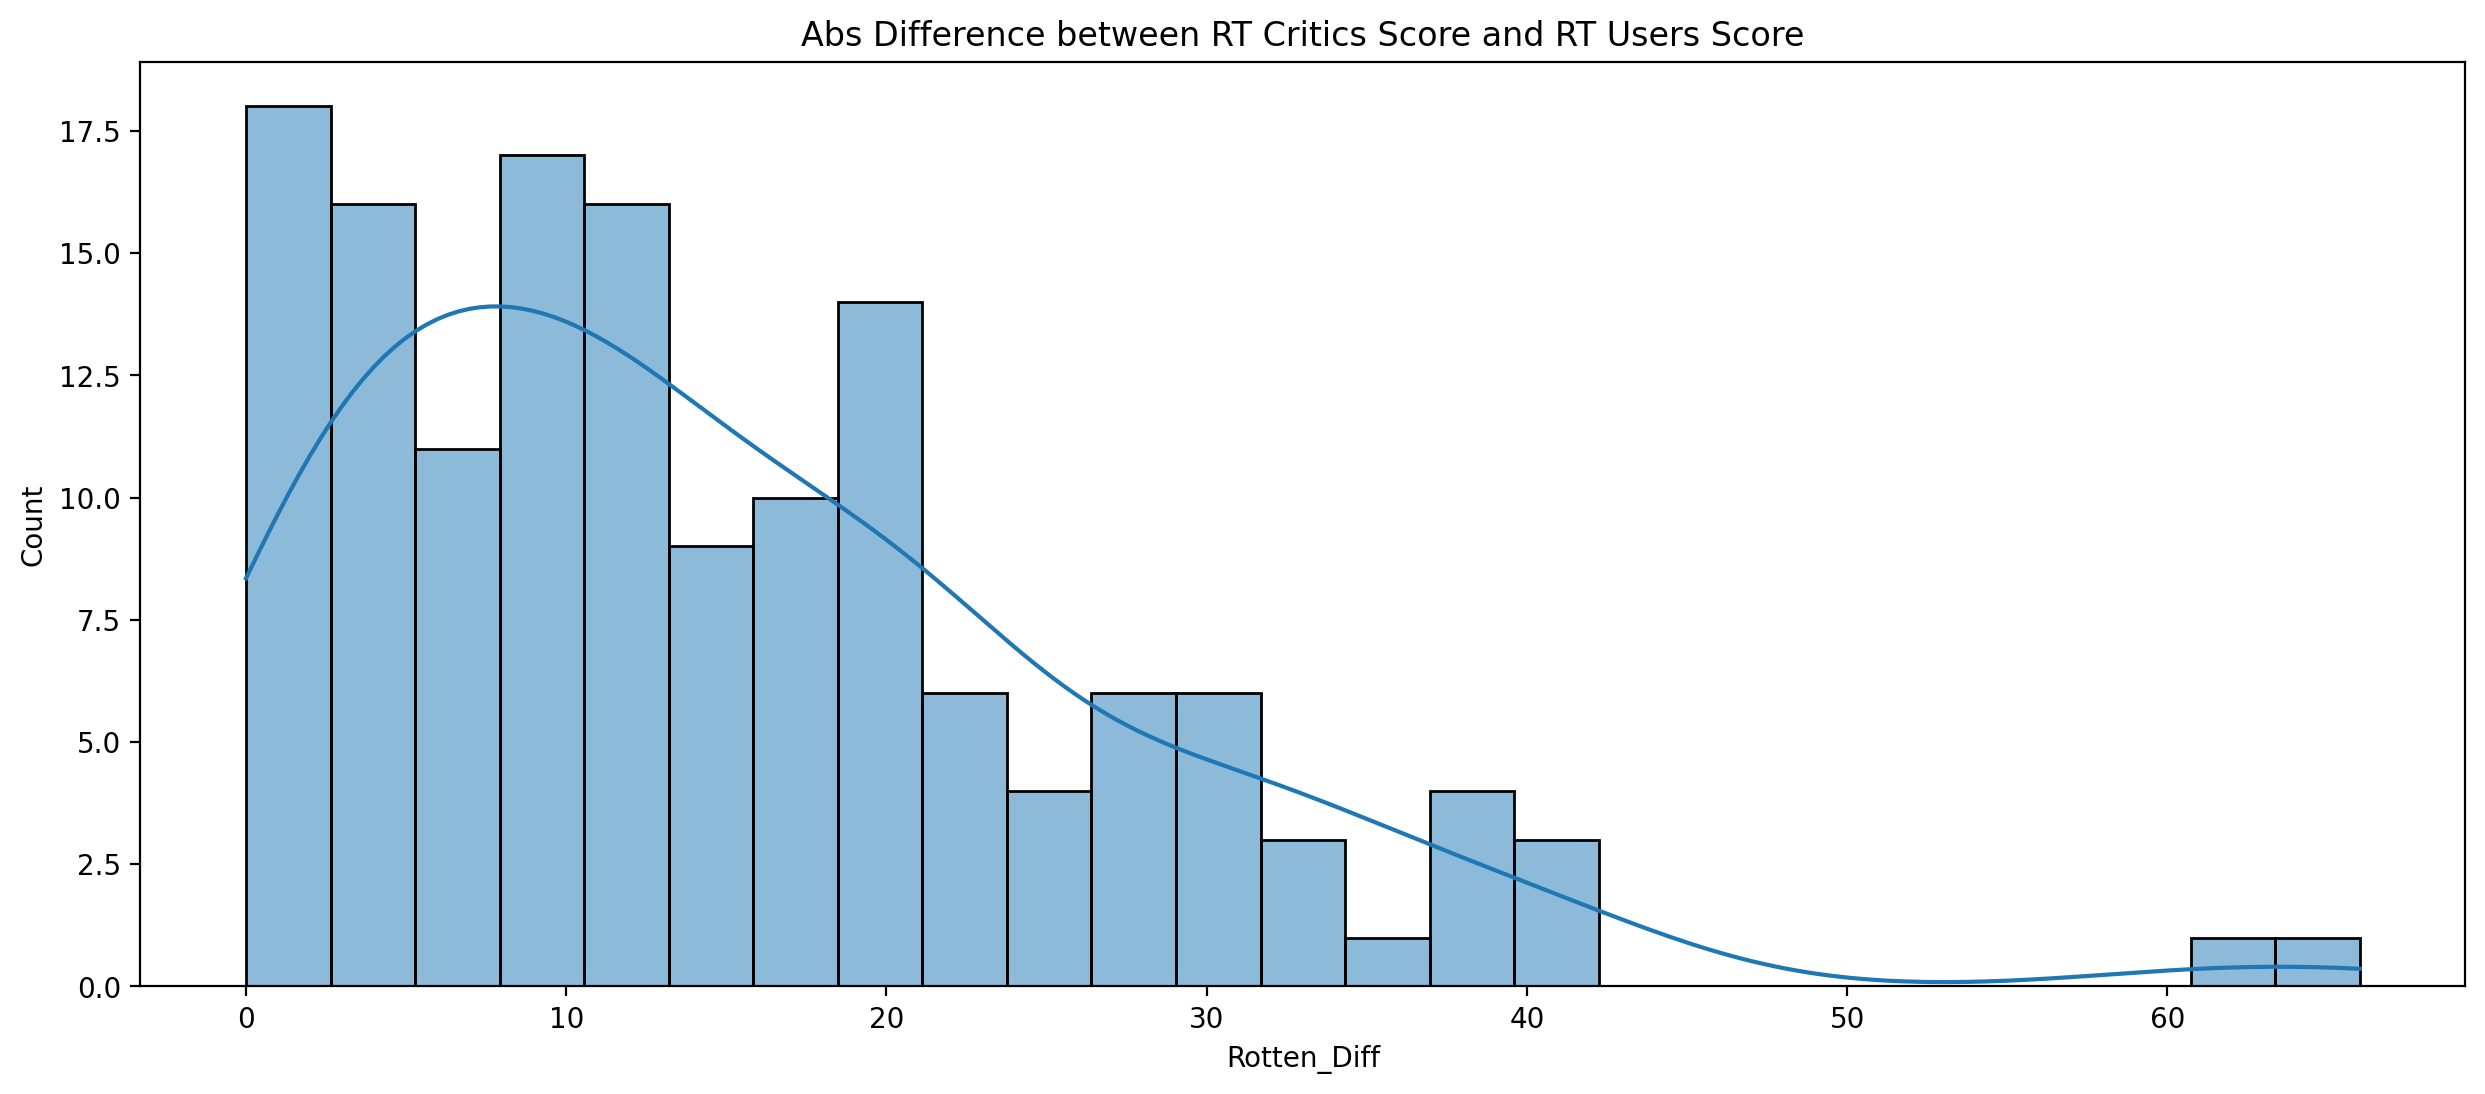

In [28]:
plt.figure(figsize=(15,6),dpi=200)
plt.title('Abs Difference between RT Critics Score and RT Users Score')
sns.histplot(x=abs(all_sites['Rotten_Diff']),kde=True,bins=25);

**What are the top 5 movies that users rated higher than critics on average?**

In [29]:
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**What are the top 5 movies that critics rated higher than users on average?**

In [30]:
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

**Now let's check the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.**

**The correlation between these values is presented below.**

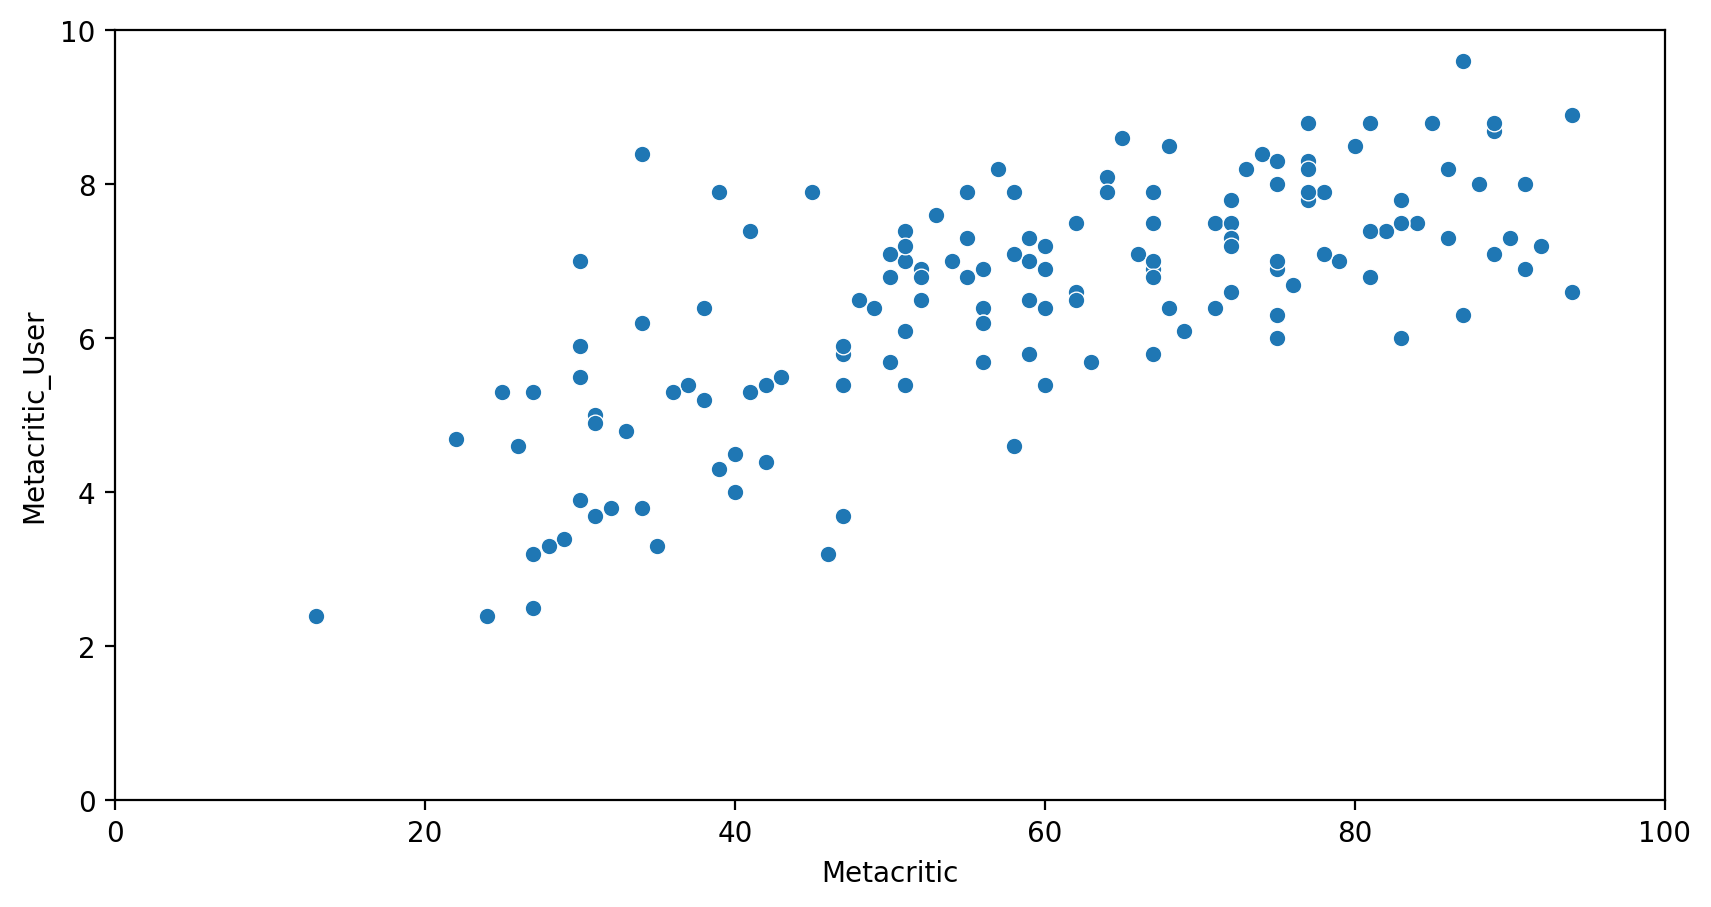

In [31]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10);

**It is also possible to check a correlation between these votes, it means, normally users and critics agree with the movie rate.**

## IMDB

**Let's check also the IMDB data. In the file, both Metacritic and IMDB report back vote counts. We can check the popularity of movies votes.**

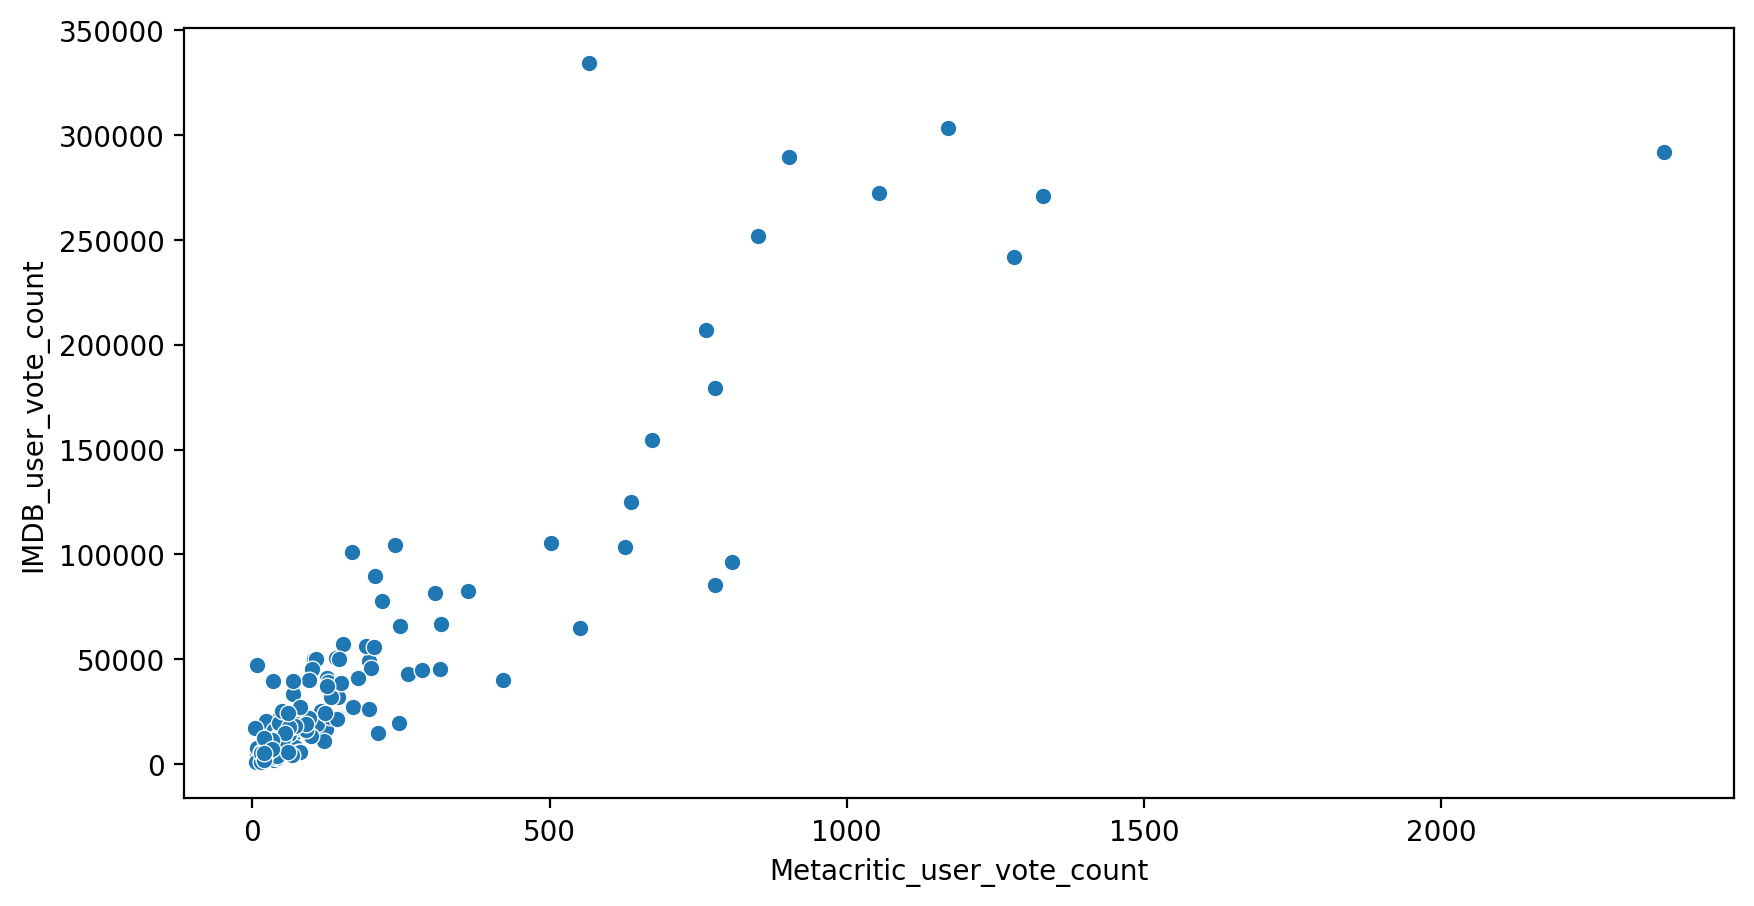

In [32]:
plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count');

**Notice there are two outliers here. Which were the movies with the highest vote count on IMDB and highest vote count Metacritic ratings?**

In [33]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [34]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## All data together

**Here I will check if there is agreement between the score presented by Fandango and the ones presented by the other sites.**

**First I will merge the Fandango table with the All Sites table. I will just take on account the movies which are on both tables.**

In [35]:
both = pd.merge(fandango,all_sites,how='inner',on="FILM")
both

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,86,7.3,7.4,14,696,9


In [36]:
both.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   STARS_DIFF                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_Diff                 145 non

In [37]:
both.describe()

,STARS,RATING,VOTES,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,0.244828,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069
std,0.541169,0.502437,6368.668671,0.152721,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488
min,3.000000,2.700000,35.000000,0.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,3.500000,3.500000,218.000000,0.100000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000
50%,4.000000,3.900000,1430.000000,0.200000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000
75%,4.500000,4.200000,4279.000000,0.400000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000
max,5.000000,4.800000,34846.000000,0.500000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000


**Now, in order to compare, I will normalize all the scores to have rate between 0 and 5, similiar to Fandangos, and put it in a new columns. I will also round to one decimal number.**

In [38]:
both['RT_Norm'] = np.round(both['RottenTomatoes']/20,1)
both['RT_U_Norm'] = np.round(both['RottenTomatoes_User']/20,1)
both['Meta_Norm'] = np.round(both['Metacritic']/20,1)
both['Meta_U_Norm'] = np.round(both['Metacritic_User']/2,1)
both['IMDB_Norm'] = np.round(both['IMDB']/2,1)
both.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**To compare those data, I will create a new DataFrame just with the normalized rates, including both STARS and RATING from the original Fandango table.**

In [39]:
both_norm = both[['STARS','RATING','RT_Norm','RT_U_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']].copy()
both_norm

,STARS,RATING,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


### Comparing Distribution of Scores Across Sites

**Now, to check the veracity of Fandango, I will compare the rate of movies from all the sources. We can check the density of scores if they agree between them.**

There is a bug on Seaborn. I used this link to be able to move the legend: https://github.com/mwaskom/seaborn/issues/2280

In [40]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

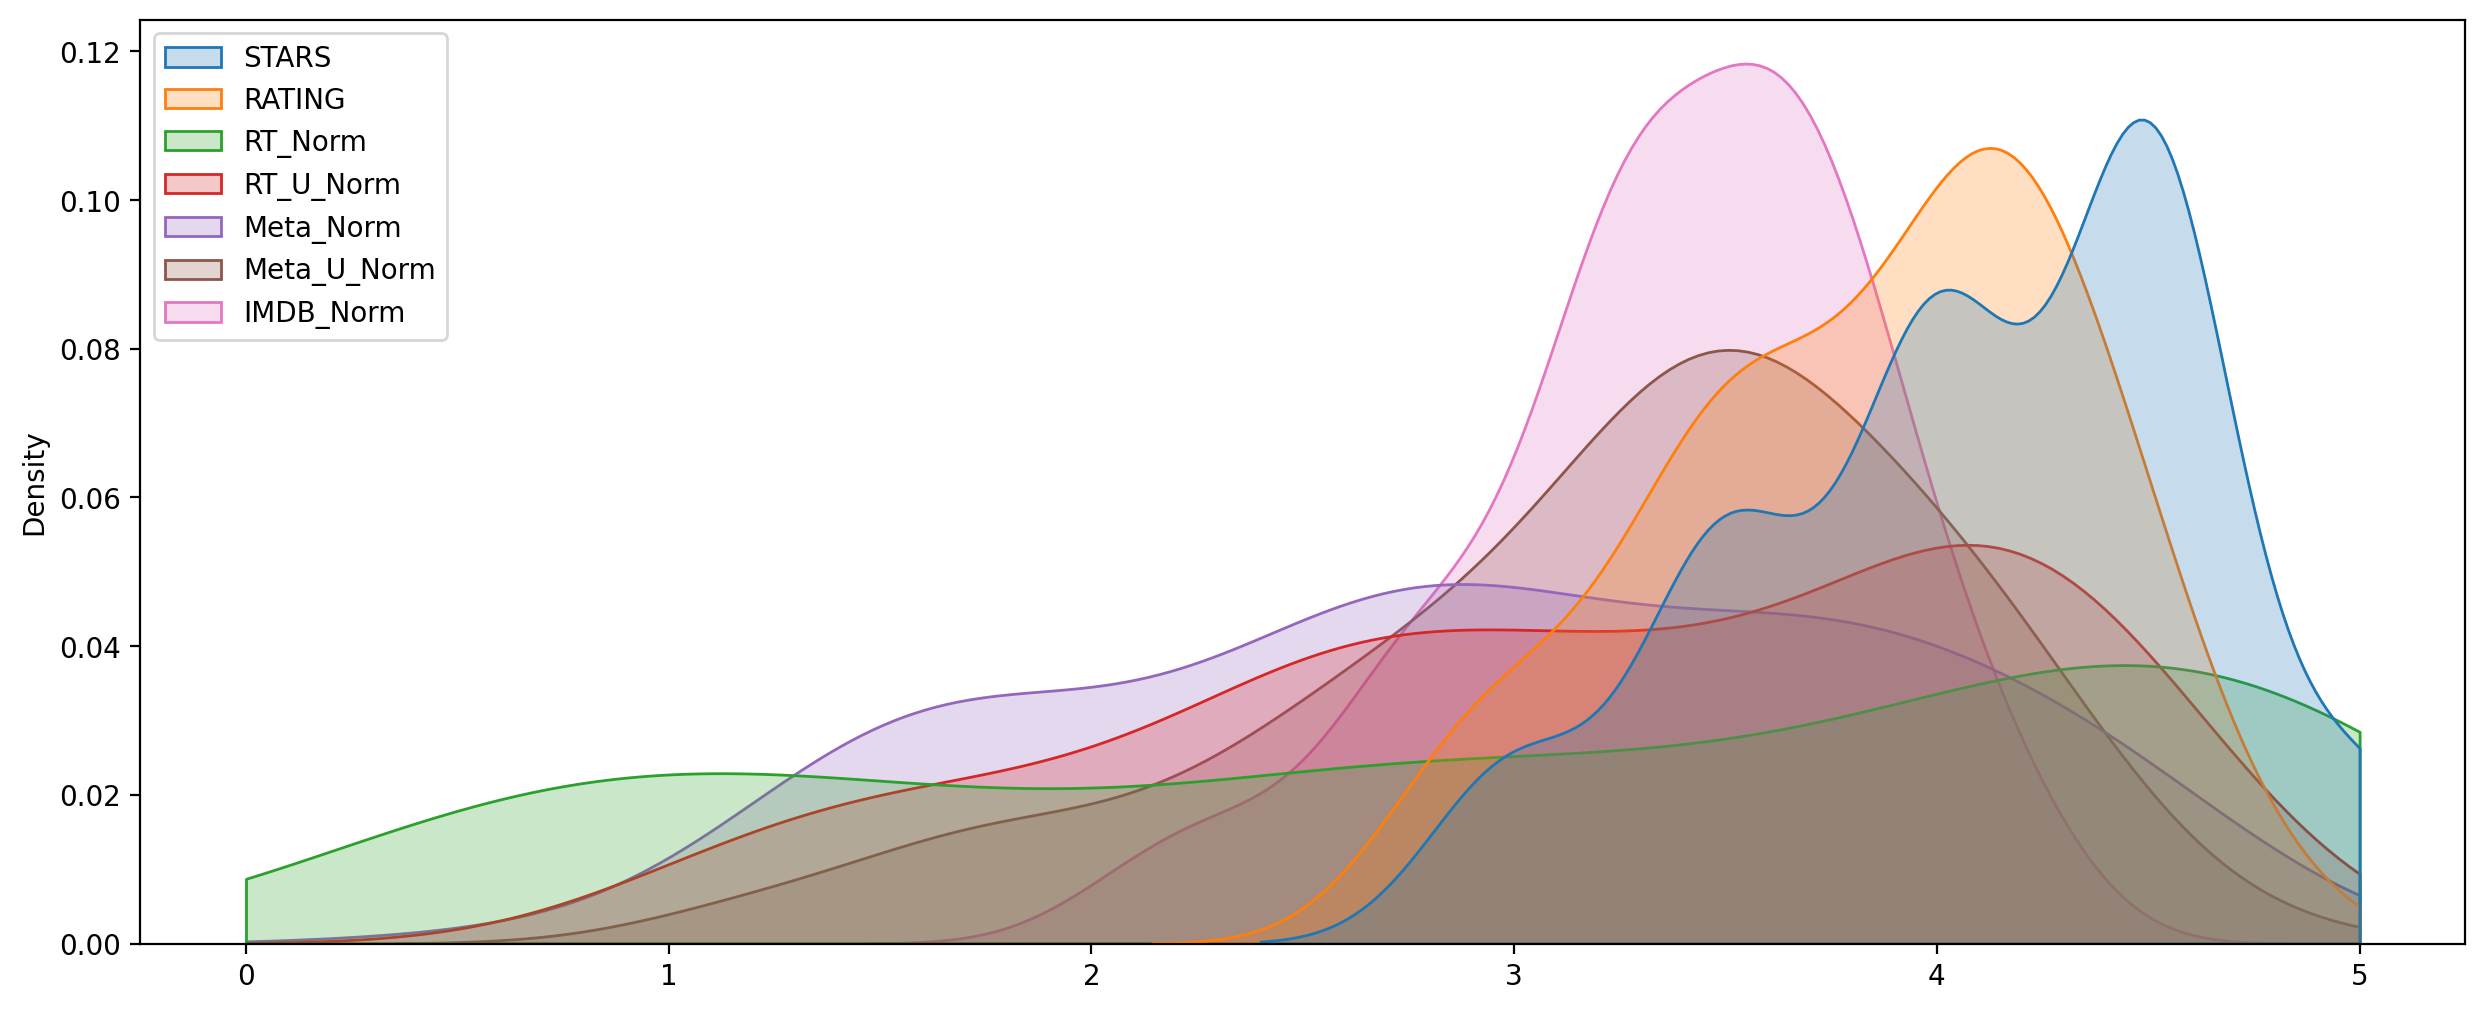

In [41]:
fig, ax = plt.subplots(figsize=(15,6),dpi=200)
sns.kdeplot(data=both_norm,clip=[0,5],shade=True)
move_legend(ax, "upper left");

**Fandango has a clear tendency to higher rates than others. RT has a much more homogenous distribution (people are not peaceful with bad movies, haha). We can compare these two results, presented below.** 

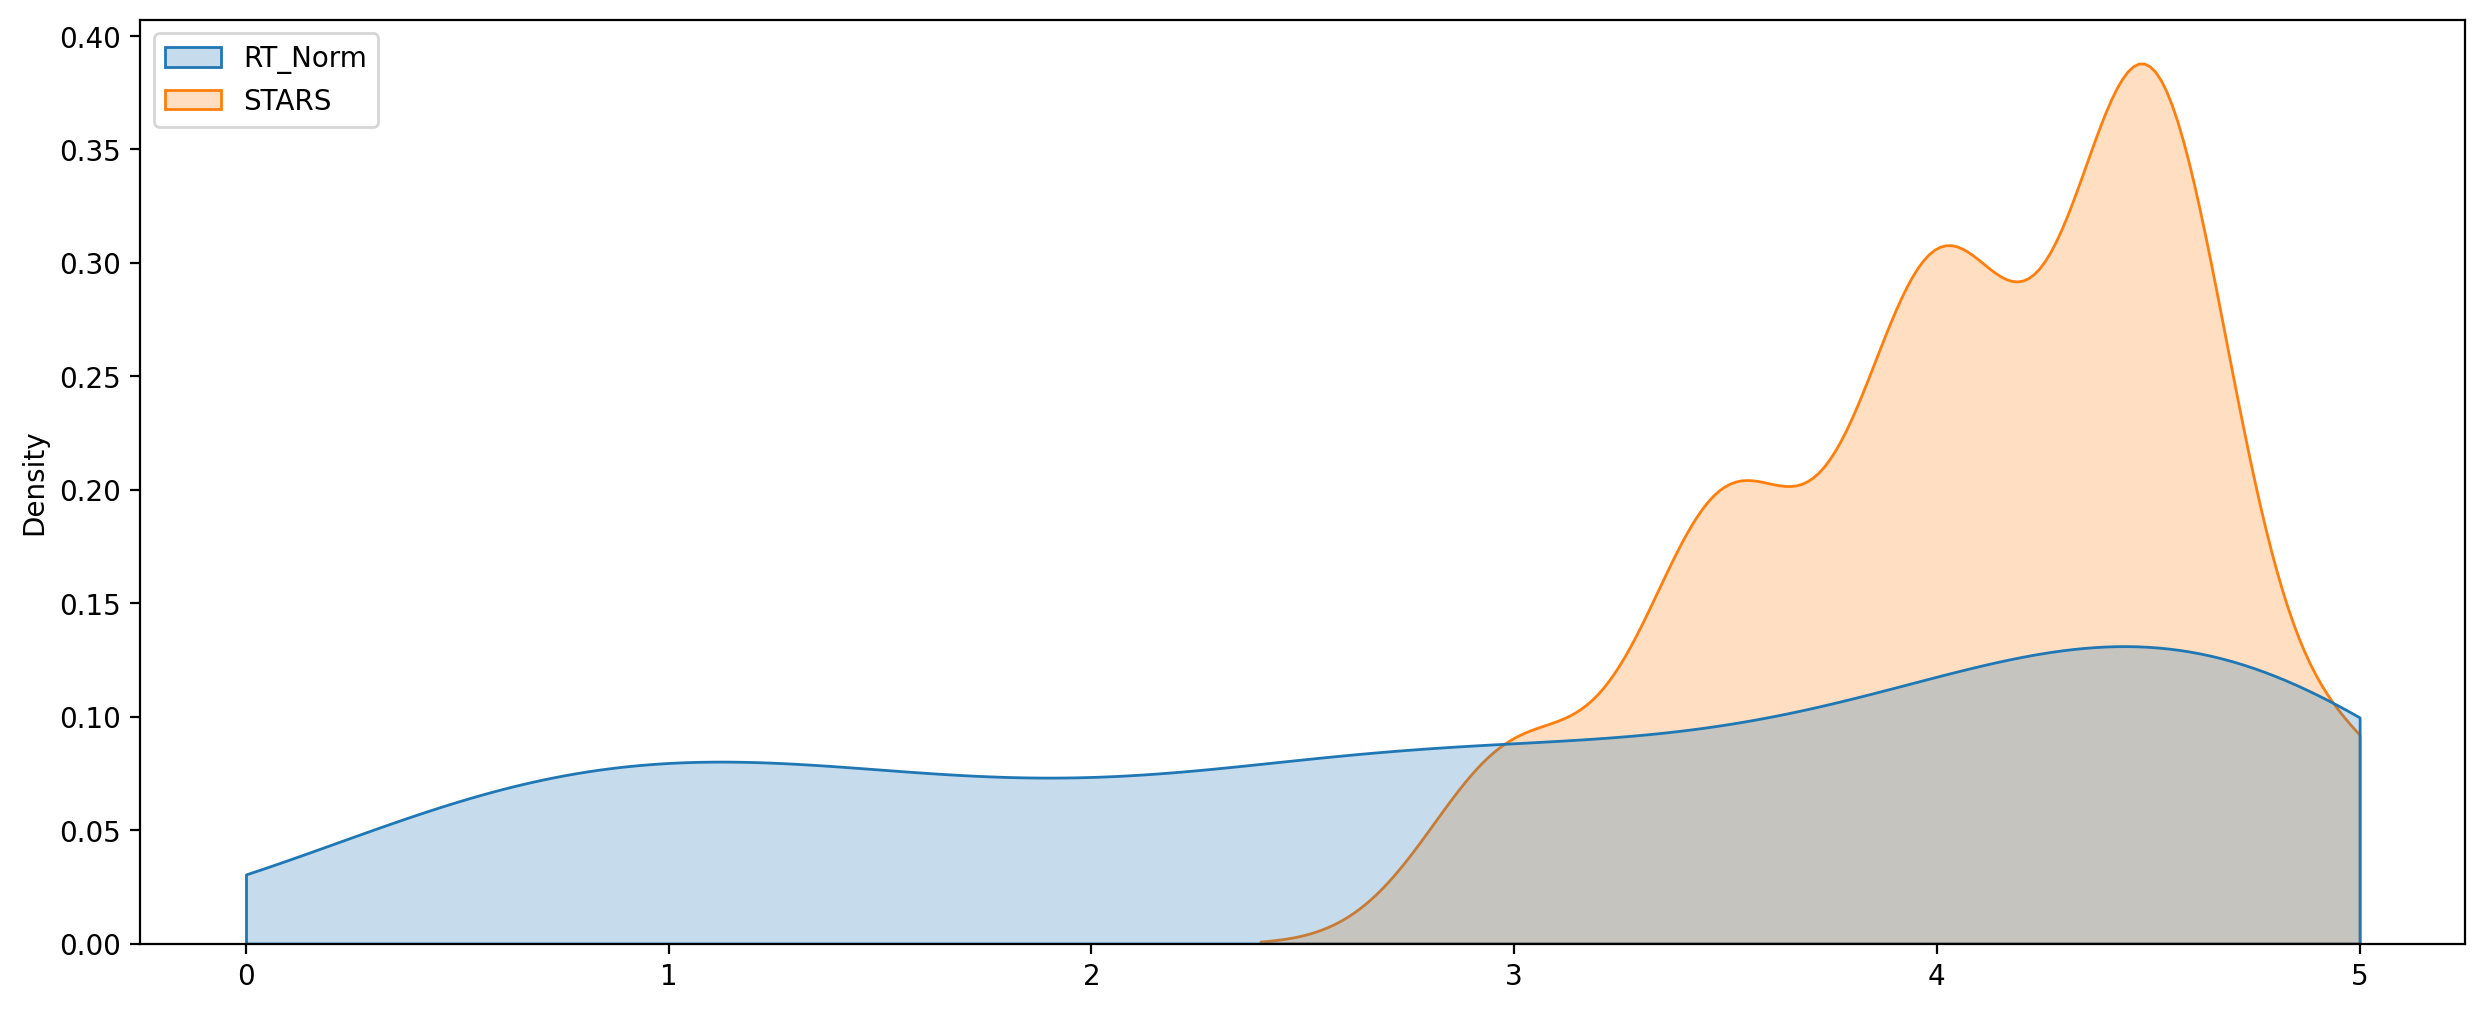

In [42]:
fig, ax = plt.subplots(figsize=(15,6),dpi=200)
sns.kdeplot(data=both_norm[['RT_Norm','STARS']],clip=[0,5],shade=True)
move_legend(ax, "upper left");

**We can also check how many times a rate appears. Similiar conclusion to the graph above can be done.** 

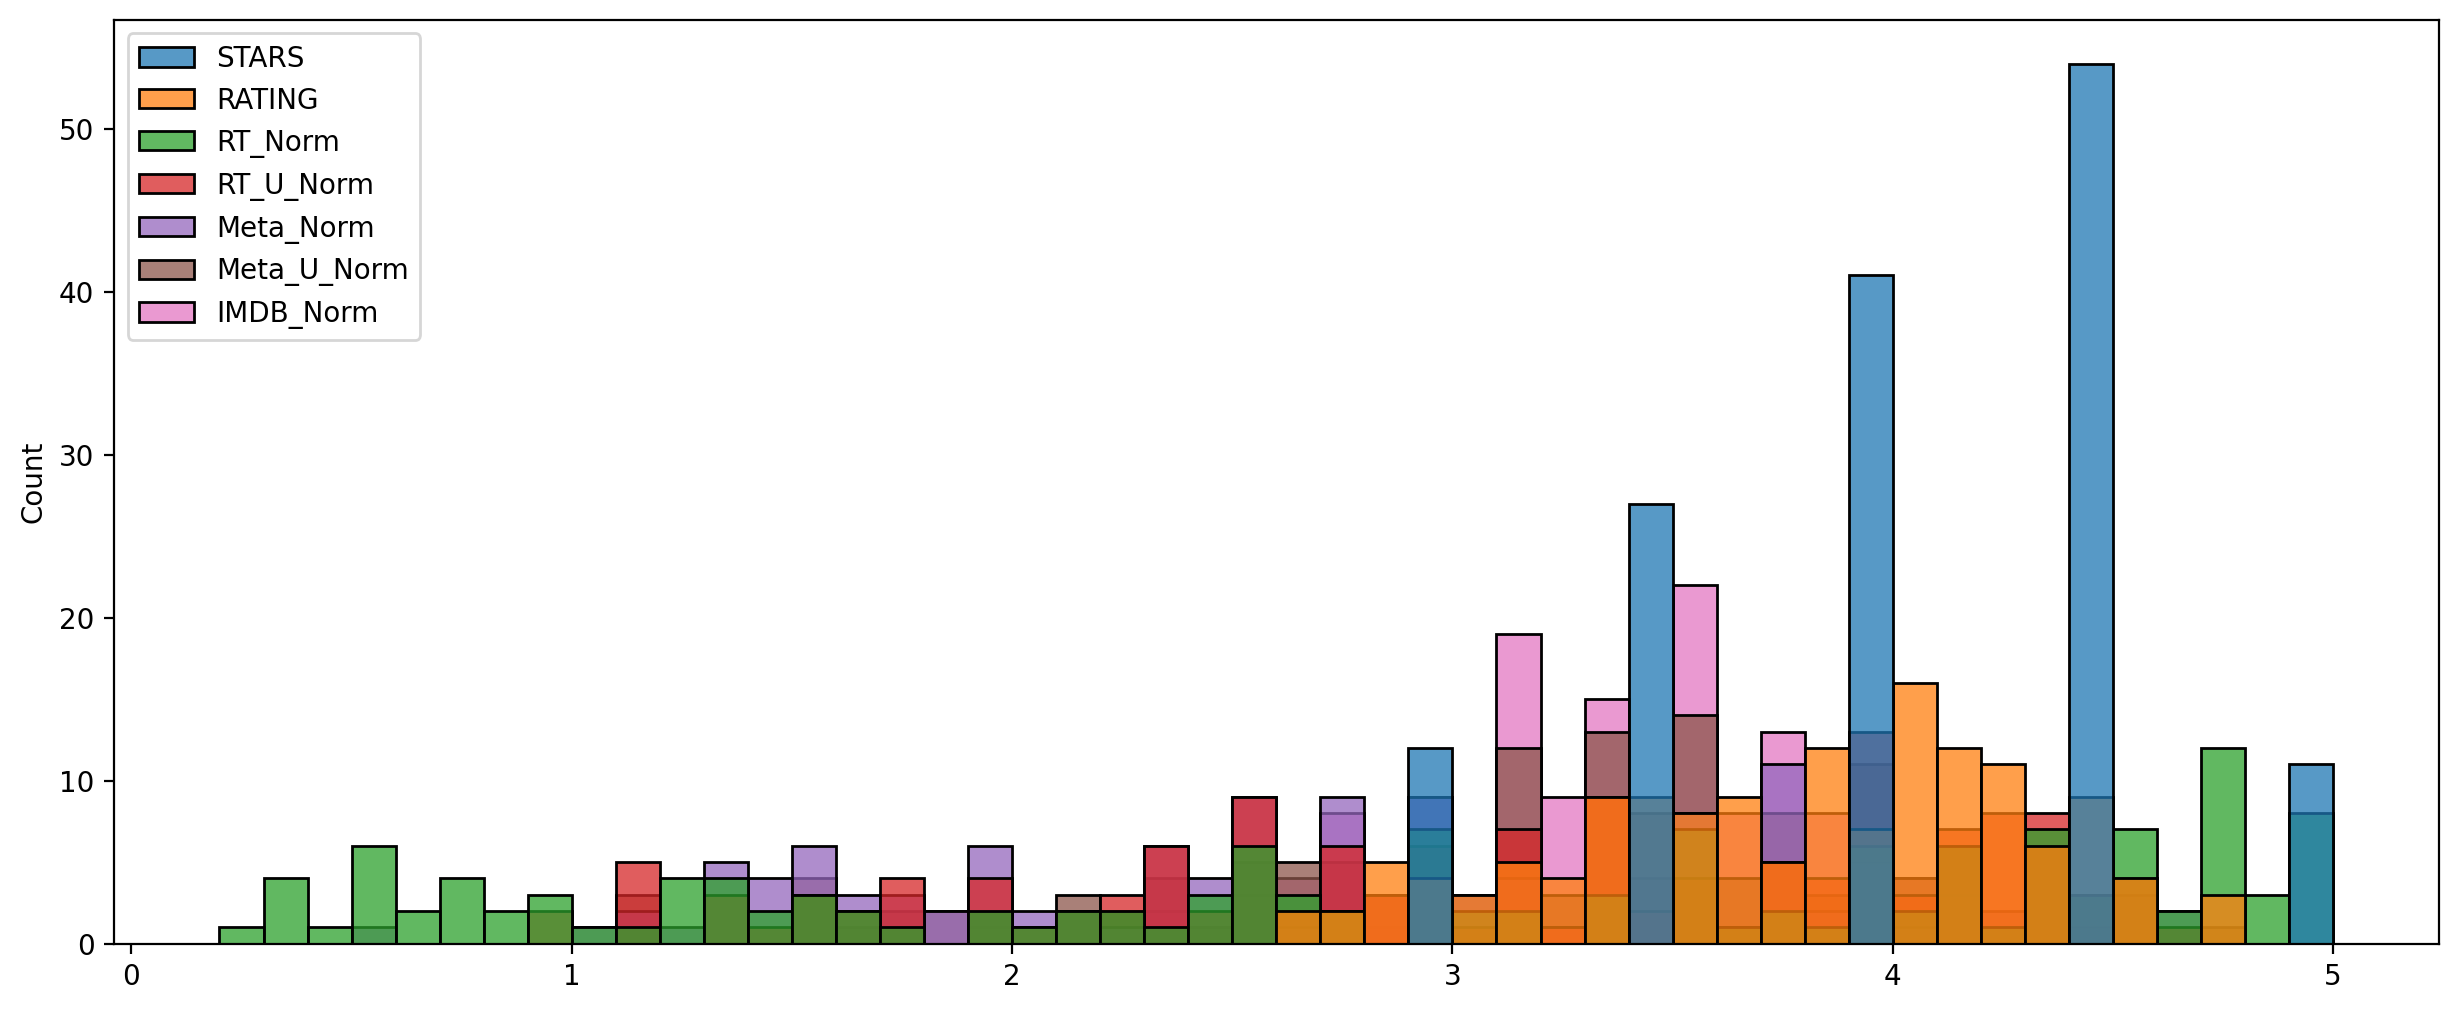

In [43]:
fig, ax = plt.subplots(figsize=(15,6),dpi=200)
sns.histplot(data=both_norm,binwidth=0.1)
move_legend(ax, "upper left")

**By a clustermap visualization of all normalized scores, we can check the differences in ratings, highly rated movies should be clustered together versus poorly rated movies. In the case of Fandango (STARS and RATING), there is no clear difference between good and bad movies neither agrees with the other ratings.**

**Clustermap is presented with the index from the table and name of movies**

<Figure size 1280x960 with 0 Axes>

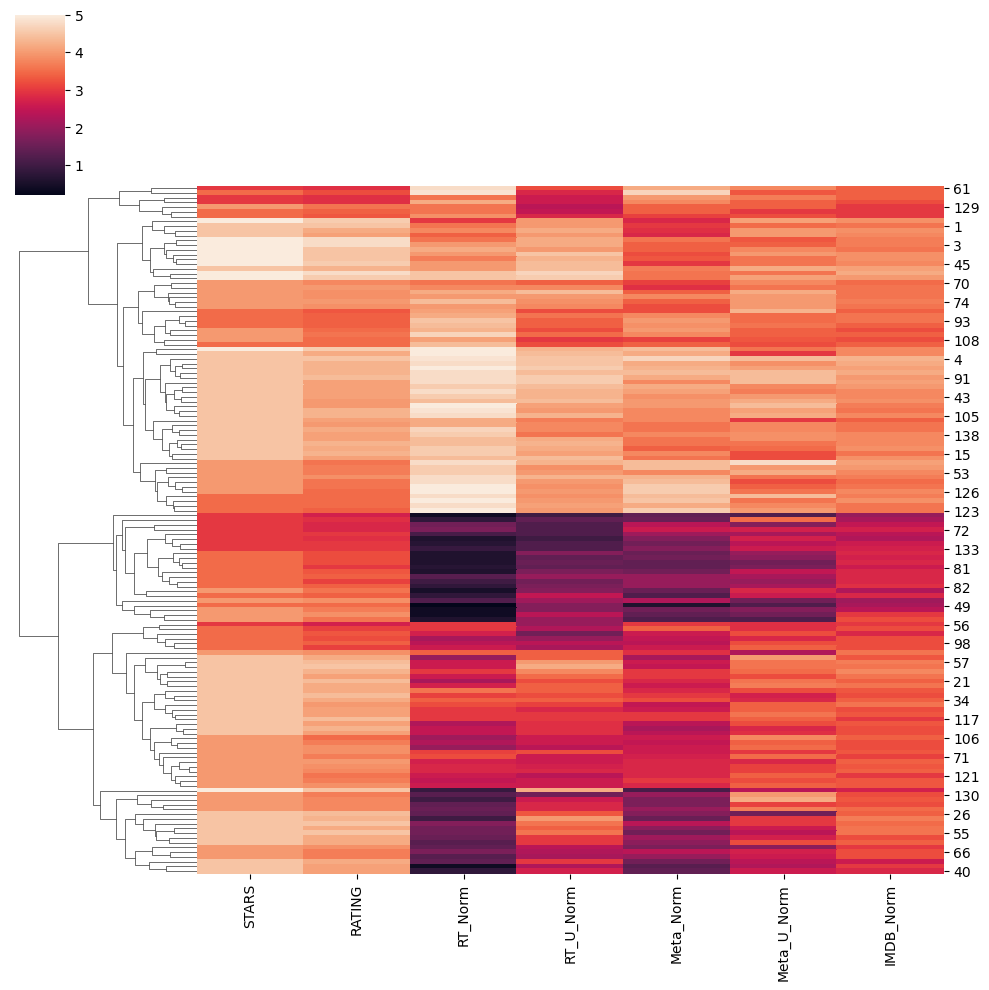

In [44]:
plt.figure(dpi=200)
sns.clustermap(both_norm,col_cluster=False);

In [45]:
both_norm_name_index = pd.merge(both_norm,both['FILM'],how='inner',right_index=True,left_index=True)
both_norm_name_index = both_norm_name_index.set_index('FILM')

<Figure size 1280x960 with 0 Axes>

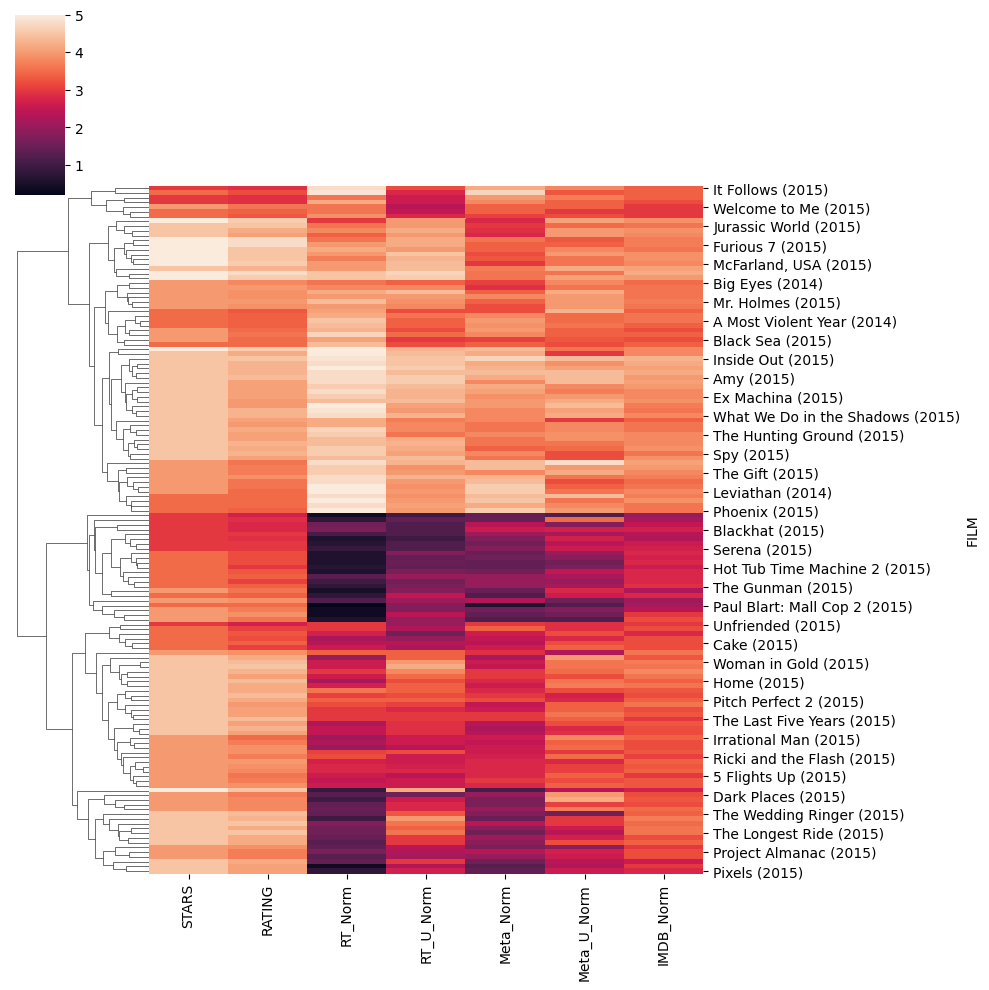

In [46]:
plt.figure(dpi=200)
sns.clustermap(both_norm_name_index,col_cluster=False);

**Based on Rotten Tomatoes Critic Ratings, I will present the top 10 lowest rated movies and check how it compare with the others and with Fandangos.**

In [47]:
both_norm_name = pd.merge(both_norm,both['FILM'],how='inner',right_index=True,left_index=True)
both_norm_name.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**Let's check the distribution of ratings across all sites for the top 10 worst movies.**

Text(0.5, 1.0, 'Top ten worst movies scores for Rotten Tomatoes (RT) critics')

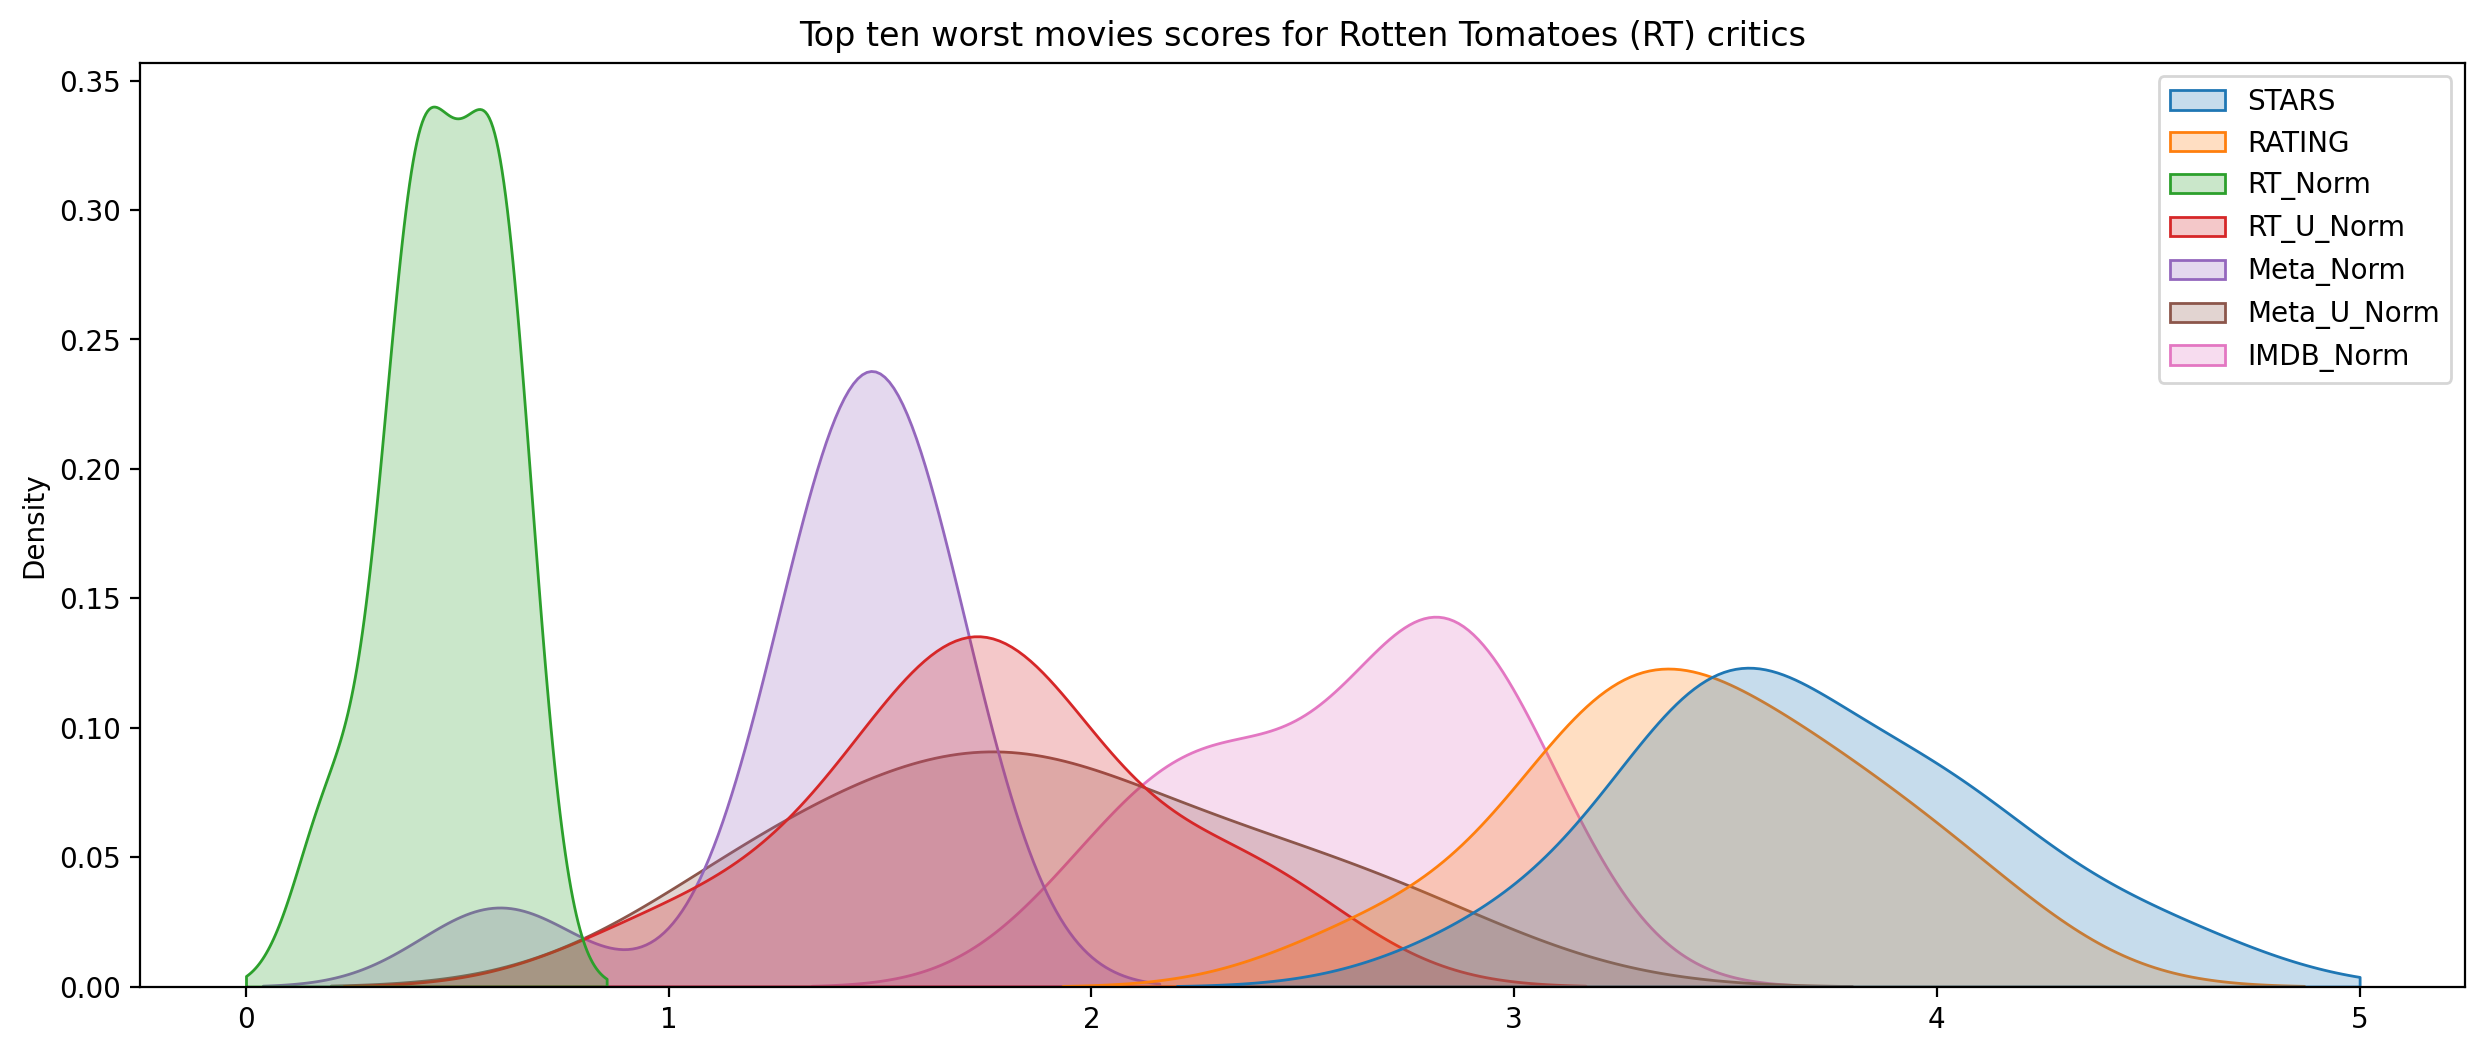

In [48]:
plt.figure(figsize=(15,6),dpi=200)
sns.kdeplot(data=(both_norm_name.nsmallest(10,'RT_Norm')),clip=[0,5],shade=True)
plt.title('Top ten worst movies scores for Rotten Tomatoes (RT) critics')

**Finally, we can check the average score on the others sites and also check the difference between this and the Fandango rate.**

In [49]:
both_norm_name['Avg_without_fandango'] = (both_norm_name['RT_Norm']+both_norm_name['RT_U_Norm']+both_norm_name['Meta_Norm']+both_norm_name['Meta_U_Norm']+both_norm_name['IMDB_Norm'])/5
both_norm_name['Diff_Stars_Avg'] = both_norm_name['STARS']-both_norm_name['Avg_without_fandango']
both_norm_name['Diff_Rating_Avg'] = both_norm_name['RATING']-both_norm_name['Avg_without_fandango']
both_norm_name.head()

,STARS,RATING,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM,Avg_without_fandango,Diff_Stars_Avg,Diff_Rating_Avg
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015),1.86,2.14,2.04
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015),3.54,0.96,0.96
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015),3.68,1.32,1.12
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015),3.74,1.26,1.06
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015),4.56,-0.06,-0.06


In [50]:
both_norm_name.nlargest(5,'Diff_Stars_Avg')

,STARS,RATING,RT_Norm,RT_U_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM,Avg_without_fandango,Diff_Stars_Avg,Diff_Rating_Avg
67,5.0,4.5,0.9,4.2,1.1,2.4,2.7,Do You Believe? (2015),2.26,2.74,2.24
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015),1.86,2.64,2.24
40,4.5,4.1,0.8,2.7,1.4,2.6,2.8,Pixels (2015),2.06,2.44,2.04
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015),1.60,2.40,2.10
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015),1.64,2.36,1.96


**Indeed, Fandango is not trustly. In case as *Do you believe* and *Taken 3*, movies have 5.0 and 4.5 stars on Fandango and the average in the others sites is 2.26 and 1.86 respectivelly. If we compare with Rotten Tomatoes, this number goes to 0.9 and 0.4 respectivelly, even worst.**

----